In [1]:
# Created 20Mar23
# To create df of schools system sizes for heatmaps of S1-S4 with mean LCUE
# Second part of this code is for plotting
# See Jupyter notebook: 'lcue_schools_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'trial_heatmap.py'


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd    # pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF schools PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s1 = s1[s1.Institution != 'Clinic']

# to check there are 148 schools
schools_s1["Site_name"].count()  # returns 148

148

In [3]:
schools_s1["LCUE"].describe().round(2)  # to know LCUE values (all schools)

count    148.00
mean       1.21
std        0.55
min        0.52
25%        0.86
50%        1.06
75%        1.48
max        4.28
Name: LCUE, dtype: float64

In [4]:
schools_s1 # to show in Jupyter

Site_name   County  Initial_PV_size  \
0          AIC_Nadoto_Primary_School  Turkana            1.325   
1    AIC_Nayanaekaton_Primary_School  Turkana            0.530   
2        A_IC_Gangani_Primary_School    Kwale            0.530   
3            Abagarse_Primary_School   Isiolo            0.265   
4             Akadeli_Primary_School   Isiolo            0.795   
..                               ...      ...              ...   
160        Vithunguni_Primary_School   Kilifi            0.530   
161            Watala_Primary_School   Kilifi            1.325   
163             Yapha_Primary_School    Kwale            1.590   
164            Ziwani_Primary_School   Kilifi            0.795   
165       Ziyaradundo_Primary_School    Kwale            1.325   

     Initial_storage_size  Final_PV_size  Final_storage_size   LCUE  \
0                     3.0          1.126               2.913  1.519   
1                     2.0          0.450               1.918  1.470   
2                     2.0          0.450               1.841  0.858   
3                     2.0          0.225               1.928  1.518   
4                     3.0          0.676               2.904  0.807   
..                    ...            ...                 ...    ...   
160                   3.0          0.450               2.898  1.699   
161                   3.0          1.126               2.889  1.642   
163                   6.0          1.352               5.728  1.125   
164                   3.0          0.676               2.913  1.930   
165                   4.0          1.126               3.642  0.719   

     Emissions_intensity  Cumulative_system_cost  Cumulative_system_GHG  \
0                600.363                3964.432               2804.775   
1                391.618                3015.442               1433.110   
2                228.788                3015.442               1433.110   
3                304.466                2824.112               1012.555   
4                248.576                3581.772               1963.665   
..                   ...                     ...                    ...   
160              434.474                3390.442               1543.110   
161              680.054                4322.062               3176.775   
163              428.077                5280.762               3555.330   
164              596.233                3581.772               1963.665   
165              270.957                4339.432               2914.775   

     Blackouts  Unmet_energy_fraction Institution  
0          0.0                    0.0      School  
1          0.0                    0.0      School  
2          0.0                    0.0      School  
3          0.0                    0.0      School  
4          0.0                    0.0      School  
..         ...                    ...         ...  
160        0.0                    0.0      School  
161        0.0                    0.0      School  
163        0.0                    0.0      School  
164        0.0                    0.0      School  
165        0.0                    0.0      School  

[148 rows x 13 columns]

In [5]:
# LCUE:
# Groups schools by Initial storage and PV size and calculates average LCUE in that bin
lcue_schools_s1 = schools_s1.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_schools_s1 = lcue_schools_s1.to_frame()
lcue_schools_s1.round(3) # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size       
1.0                  0.265            1.926
                     0.530            1.825
                     0.795            1.800
2.0                  0.265            2.129
                     0.530            1.260
                     0.795            1.097
                     1.060            0.818
                     1.325            0.814
                     1.590            1.098
                     2.385            0.914
3.0                  0.265            2.337
                     0.530            1.447
                     0.795            1.244
                     1.060            0.824
                     1.325            0.996
                     1.590            1.003
4.0                  0.530            1.527
                     0.795            1.342
                     1.060            0.944
                     1.325            0.918
                     1.590            0.590
5.0                  0.530            1.011
                     0.795            1.354
                     1.060            0.968
                     1.325            0.885
                     1.855            1.025
                     2.120            0.686
6.0                  0.795            1.660
                     1.060            1.228
                     1.590            1.072
                     1.855            0.609
                     2.120            1.303
                     2.385            0.559
                     2.915            0.864
7.0                  0.530            1.320
                     1.060            1.380
                     1.590            0.669
                     1.855            1.059
8.0                  1.855            0.580
                     2.915            1.683
9.0                  1.855            1.136
                     2.120            0.854
                     2.385            1.245
                     3.445            0.542
10.0                 2.120            0.595
11.0                 1.855            1.534
14.0                 2.385            4.285
                     3.180            0.564

In [6]:
# to know schools min and max average LCUE values (vmin & vmax)
lcue_schools_s1["LCUE"].describe().round(3)
                    # returns: min= 0.542 (vmin), max= 4.285 (vmax)
                    # returns count != than 148 because some sites have same size

count    48.000
mean      1.198
std       0.624
min       0.542
25%       0.847
50%       1.066
75%       1.360
max       4.285
Name: LCUE, dtype: float64

In [7]:
# Pivot df to be able to do heatmap
lcue_schools_s1_hp = lcue_schools_s1.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_schools_s1_hp.round(3) # to show in Jupyter

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  1.590  1.855  2.120  \
Initial_storage_size                                                           
1.0                   1.926  1.825  1.800    NaN    NaN    NaN    NaN    NaN   
2.0                   2.129  1.260  1.097  0.818  0.814  1.098    NaN    NaN   
3.0                   2.337  1.447  1.244  0.824  0.996  1.003    NaN    NaN   
4.0                     NaN  1.527  1.342  0.944  0.918  0.590    NaN    NaN   
5.0                     NaN  1.011  1.354  0.968  0.885    NaN  1.025  0.686   
6.0                     NaN    NaN  1.660  1.228    NaN  1.072  0.609  1.303   
7.0                     NaN  1.320    NaN  1.380    NaN  0.669  1.059    NaN   
8.0                     NaN    NaN    NaN    NaN    NaN    NaN  0.580    NaN   
9.0                     NaN    NaN    NaN    NaN    NaN    NaN  1.136  0.854   
10.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.595   
11.0                    NaN    NaN    NaN    NaN    NaN    NaN  1.534    NaN   
14.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Initial_PV_size       2.385  2.915  3.180  3.445  
Initial_storage_size                              
1.0                     NaN    NaN    NaN    NaN  
2.0                   0.914    NaN    NaN    NaN  
3.0                     NaN    NaN    NaN    NaN  
4.0                     NaN    NaN    NaN    NaN  
5.0                     NaN    NaN    NaN    NaN  
6.0                   0.559  0.864    NaN    NaN  
7.0                     NaN    NaN    NaN    NaN  
8.0                     NaN  1.683    NaN    NaN  
9.0                   1.245    NaN    NaN  0.542  
10.0                    NaN    NaN    NaN    NaN  
11.0                    NaN    NaN    NaN    NaN  
14.0                  4.285    NaN  0.564    NaN

In [8]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

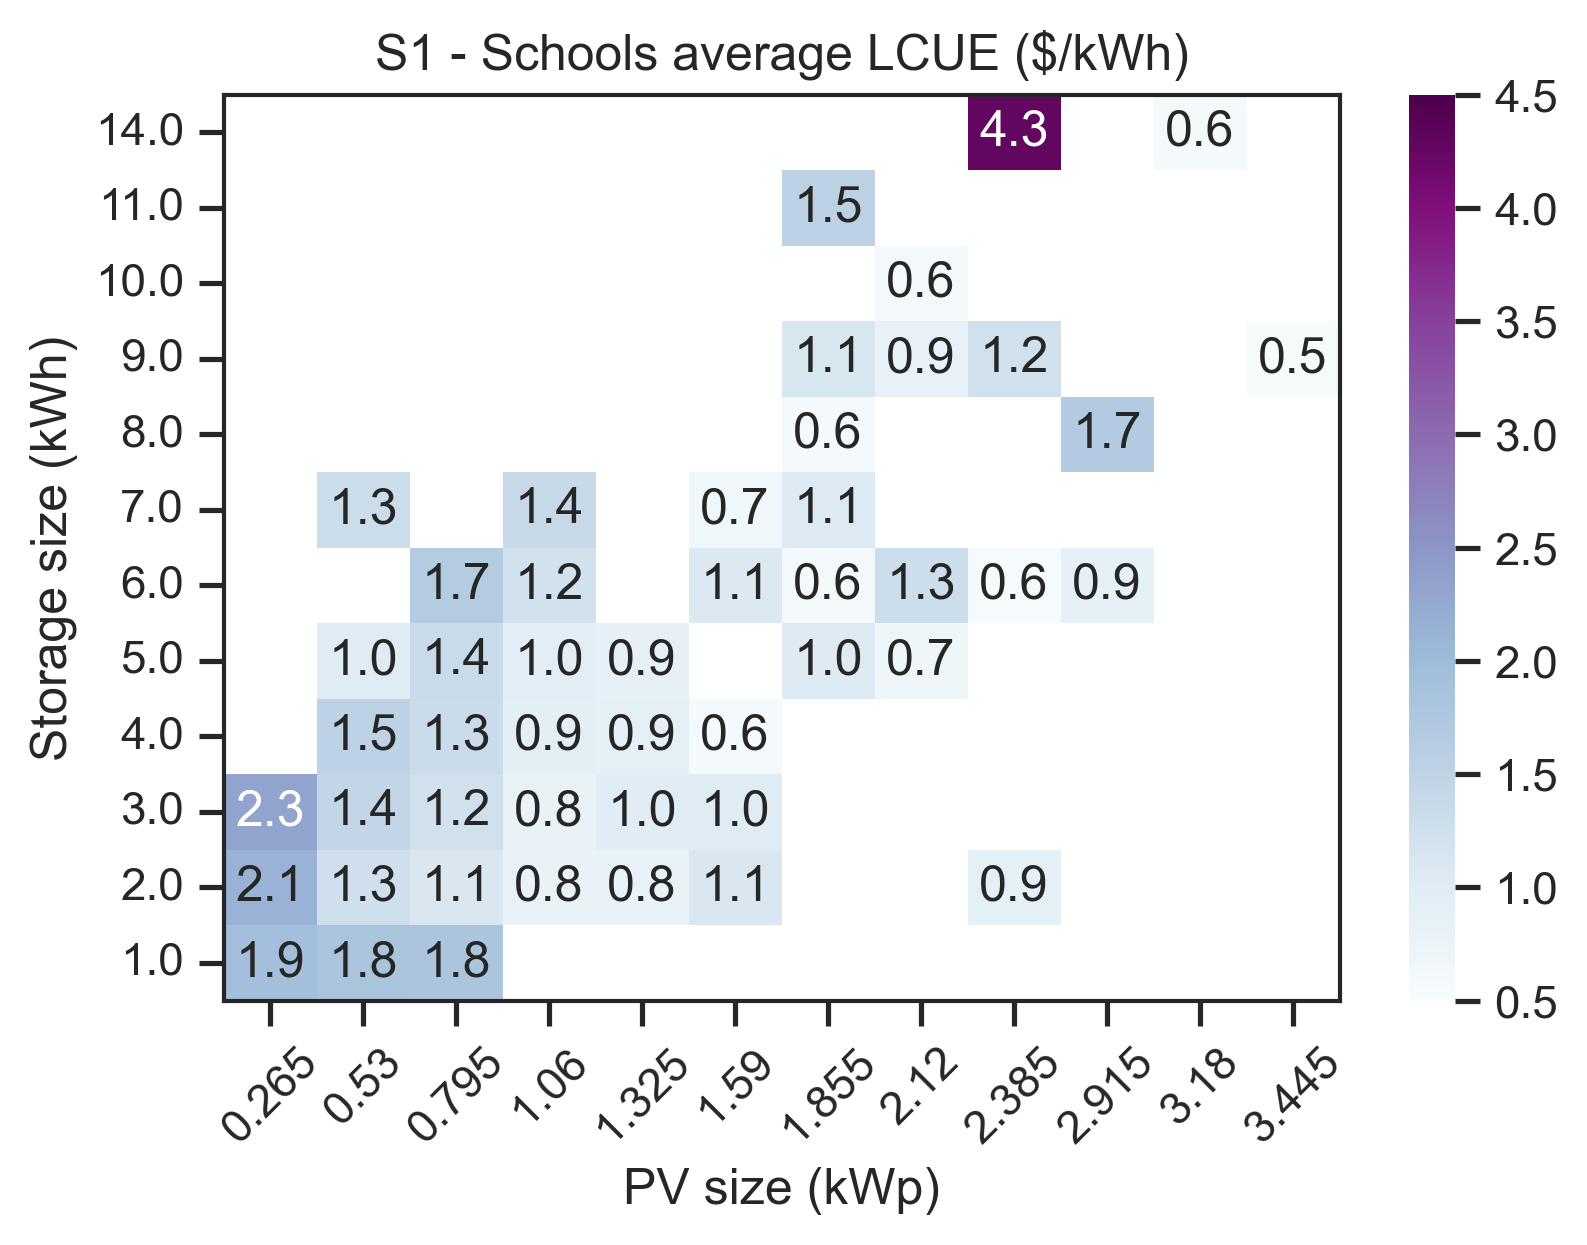

In [10]:
# S1 SCHOOL LCUE PLOT (to plot data as it is - delete vmin and vmax for raw plot)
ax = sns.heatmap(lcue_schools_s1_hp, vmin=0.5, vmax=4.5, cmap="BuPu", annot=True, fmt=".1f")
ax.invert_yaxis()
ax.set_title("S1 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

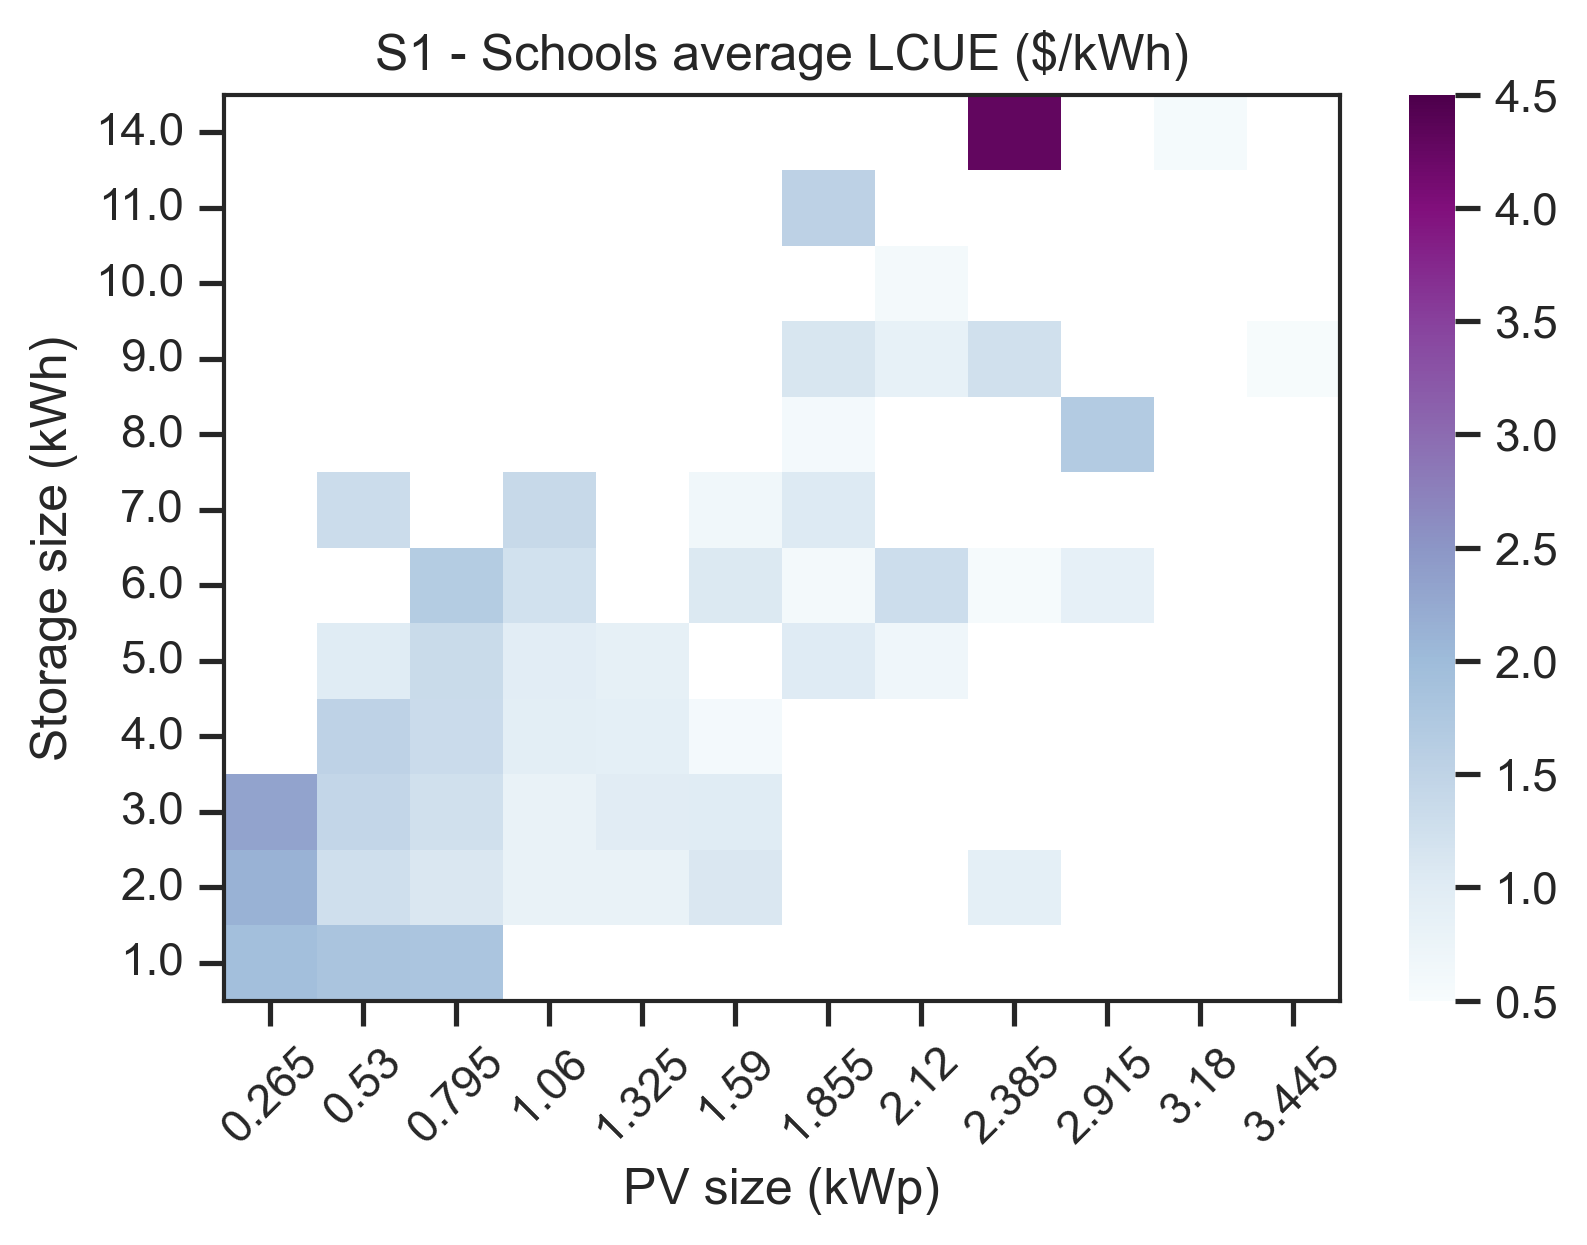

In [11]:
# S1 SCHOOL LCUE PLOT (withOUT annotations)
ax = sns.heatmap(lcue_schools_s1_hp, vmin=0.5, vmax=4.5, cmap="BuPu")
ax.invert_yaxis()
ax.set_title("S1 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

In [12]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s2 = s2[s2.Institution != 'Clinic']
# to check there are 148 schools
schools_s2["Site_name"].count()  # returns 148

148

In [13]:
schools_s2["LCUE"].describe().round(2)  # to know LCUE values (all schools)

count    148.00
mean       1.07
std        0.50
min        0.44
25%        0.75
50%        0.93
75%        1.28
max        3.80
Name: LCUE, dtype: float64

In [14]:
# LCUE:
# Groups schools by Initial storage and PV size and calculates average LCUE in that bin
lcue_schools_s2 = schools_s2.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_schools_s2 = lcue_schools_s2.to_frame()
lcue_schools_s2.round(3) # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size       
1.0                  0.265            1.900
                     0.530            1.411
                     0.795            0.910
2.0                  0.265            1.325
                     0.530            1.046
                     0.795            0.946
                     1.060            0.926
                     1.325            0.757
3.0                  0.530            1.339
                     0.795            0.860
                     1.060            0.718
                     1.325            0.535
4.0                  0.795            0.736
                     1.060            1.046
                     1.325            0.706
                     1.855            0.660
5.0                  0.530            1.092
                     1.060            0.971
                     1.325            0.784
                     1.590            0.686
                     1.855            0.761
6.0                  1.060            0.628
                     1.325            0.665
                     1.590            0.879
7.0                  1.590            0.586
8.0                  1.590            0.505
                     1.855            0.443
9.0                  1.590            1.358
11.0                 2.385            3.802
12.0                 2.120            0.480

In [15]:
# to know schools min and max average LCUE values (vmin & vmax)
lcue_schools_s2["LCUE"].describe().round(3)
                    # returns: min= 0.443 (vmin), max= 3.802 (vmax)
                    # returns count != than 148 because some sites have same size

count    30.000
mean      0.982
std       0.625
min       0.443
25%       0.670
50%       0.822
75%       1.046
max       3.802
Name: LCUE, dtype: float64

In [16]:
# Pivot df to be able to do heatmap
lcue_schools_s2_hp = lcue_schools_s2.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_schools_s2_hp.round(3)  # to show in Jupyter

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  1.590  1.855  2.120  \
Initial_storage_size                                                           
1.0                   1.900  1.411  0.910    NaN    NaN    NaN    NaN    NaN   
2.0                   1.325  1.046  0.946  0.926  0.757    NaN    NaN    NaN   
3.0                     NaN  1.339  0.860  0.718  0.535    NaN    NaN    NaN   
4.0                     NaN    NaN  0.736  1.046  0.706    NaN  0.660    NaN   
5.0                     NaN  1.092    NaN  0.971  0.784  0.686  0.761    NaN   
6.0                     NaN    NaN    NaN  0.628  0.665  0.879    NaN    NaN   
7.0                     NaN    NaN    NaN    NaN    NaN  0.586    NaN    NaN   
8.0                     NaN    NaN    NaN    NaN    NaN  0.505  0.443    NaN   
9.0                     NaN    NaN    NaN    NaN    NaN  1.358    NaN    NaN   
11.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN   0.48   

Initial_PV_size       2.385  
Initial_storage_size         
1.0                     NaN  
2.0                     NaN  
3.0                     NaN  
4.0                     NaN  
5.0                     NaN  
6.0                     NaN  
7.0                     NaN  
8.0                     NaN  
9.0                     NaN  
11.0                  3.802  
12.0                    NaN

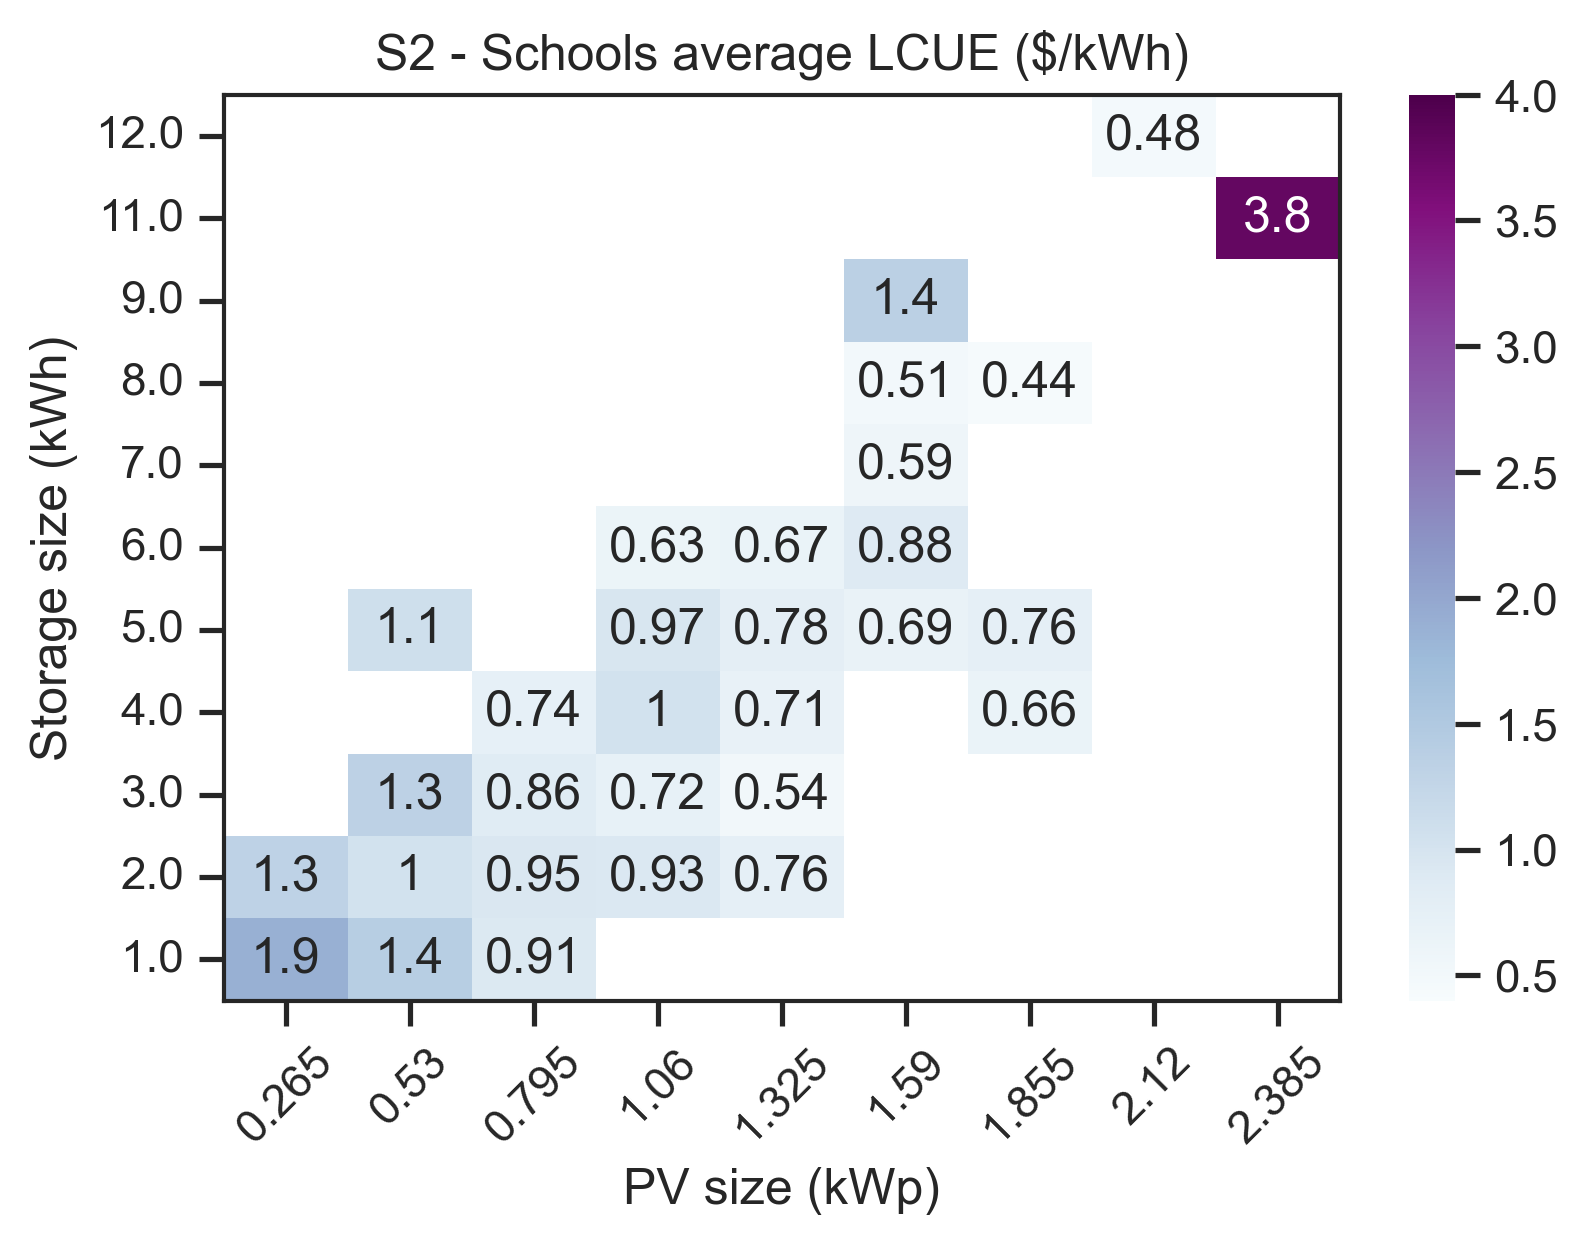

In [18]:
# S2 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_schools_s2_hp, vmin=0.4, vmax=4, cmap="BuPu", annot=True) #
ax.invert_yaxis()
ax.set_title("S2 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

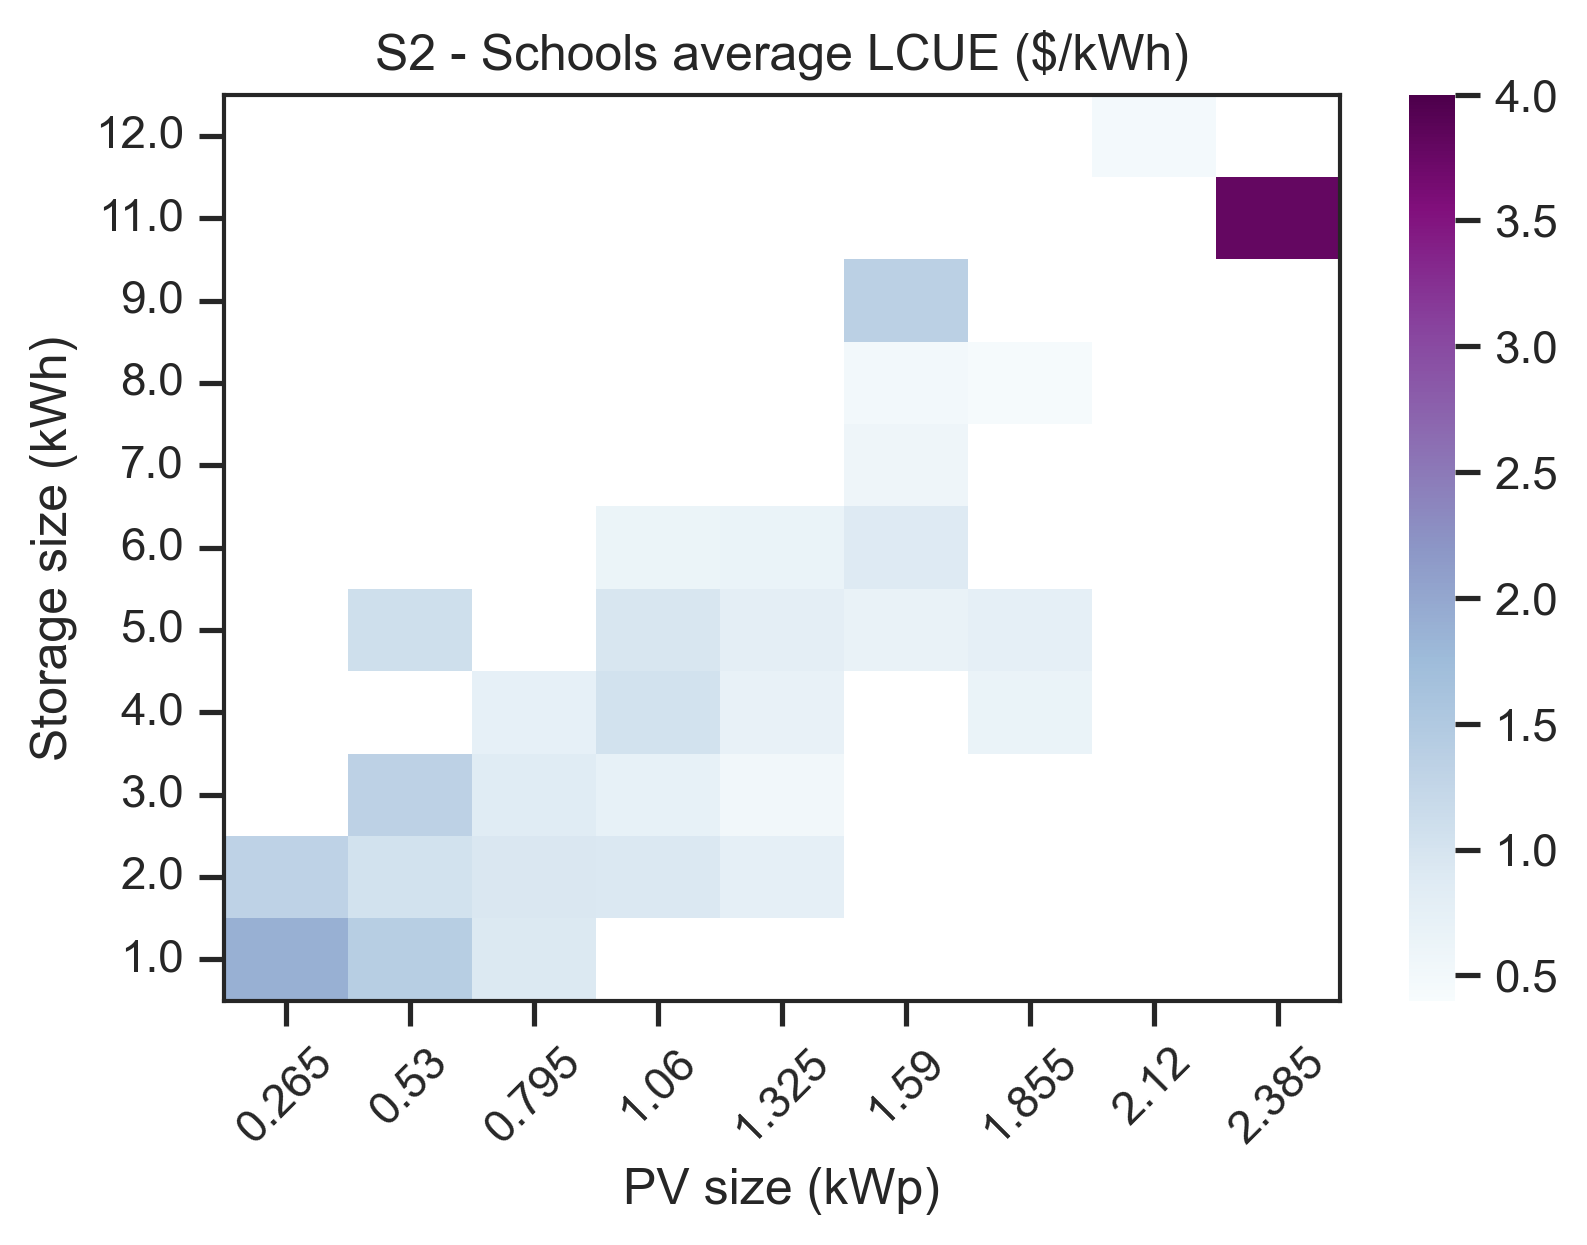

In [19]:
# S2 SCHOOL SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(lcue_schools_s2_hp, vmin=0.4, vmax=4, cmap="BuPu") #
ax.invert_yaxis()
ax.set_title("S2 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [20]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s3 = s3[s3.Institution != 'Clinic']

# to check there are 148 schools
schools_s3["Site_name"].count()  # returns 148

148

In [21]:
schools_s3["LCUE"].describe().round(2)  # to know LCUE values (all schools)

count    148.00
mean       0.98
std        0.46
min        0.39
25%        0.71
50%        0.87
75%        1.18
max        3.66
Name: LCUE, dtype: float64

In [22]:
# LCUE:
# Groups schools by Initial storage and PV size and calculates average LCUE in that bin
lcue_schools_s3 = schools_s3.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_schools_s3 = lcue_schools_s3.to_frame()
lcue_schools_s3.round(3) # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size       
1.0                  0.265            1.561
                     0.530            0.947
                     0.795            0.958
                     1.060            0.655
2.0                  0.265            1.208
                     0.530            0.926
                     0.795            0.799
                     1.060            0.663
3.0                  0.530            0.688
                     0.795            0.700
                     1.060            0.641
                     1.325            0.613
4.0                  0.795            0.882
                     1.060            0.584
                     1.325            0.477
5.0                  1.060            0.983
                     1.325            0.784
6.0                  1.325            0.539
                     1.590            0.425
8.0                  1.325            1.292
9.0                  2.120            0.428

In [23]:
# to know schools min and max average LCUE values (vmin & vmax)
lcue_schools_s3["LCUE"].describe().round(3)
                    # returns: min= 0.425 (vmin), max= 1.561  (vmax)
                    # returns count != than 148 because some sites have same size

count    21.000
mean      0.798
std       0.293
min       0.425
25%       0.613
50%       0.700
75%       0.947
max       1.561
Name: LCUE, dtype: float64

In [24]:
# Pivot df to be able to do heatmap
lcue_schools_s3_hp = lcue_schools_s3.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_schools_s3_hp.round(3) # to show in Jupyter

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  1.590  2.120
Initial_storage_size                                                 
1.0                   1.561  0.947  0.958  0.655    NaN    NaN    NaN
2.0                   1.208  0.926  0.799  0.663    NaN    NaN    NaN
3.0                     NaN  0.688  0.700  0.641  0.613    NaN    NaN
4.0                     NaN    NaN  0.882  0.584  0.477    NaN    NaN
5.0                     NaN    NaN    NaN  0.983  0.784    NaN    NaN
6.0                     NaN    NaN    NaN    NaN  0.539  0.425    NaN
8.0                     NaN    NaN    NaN    NaN  1.292    NaN    NaN
9.0                     NaN    NaN    NaN    NaN    NaN    NaN  0.428

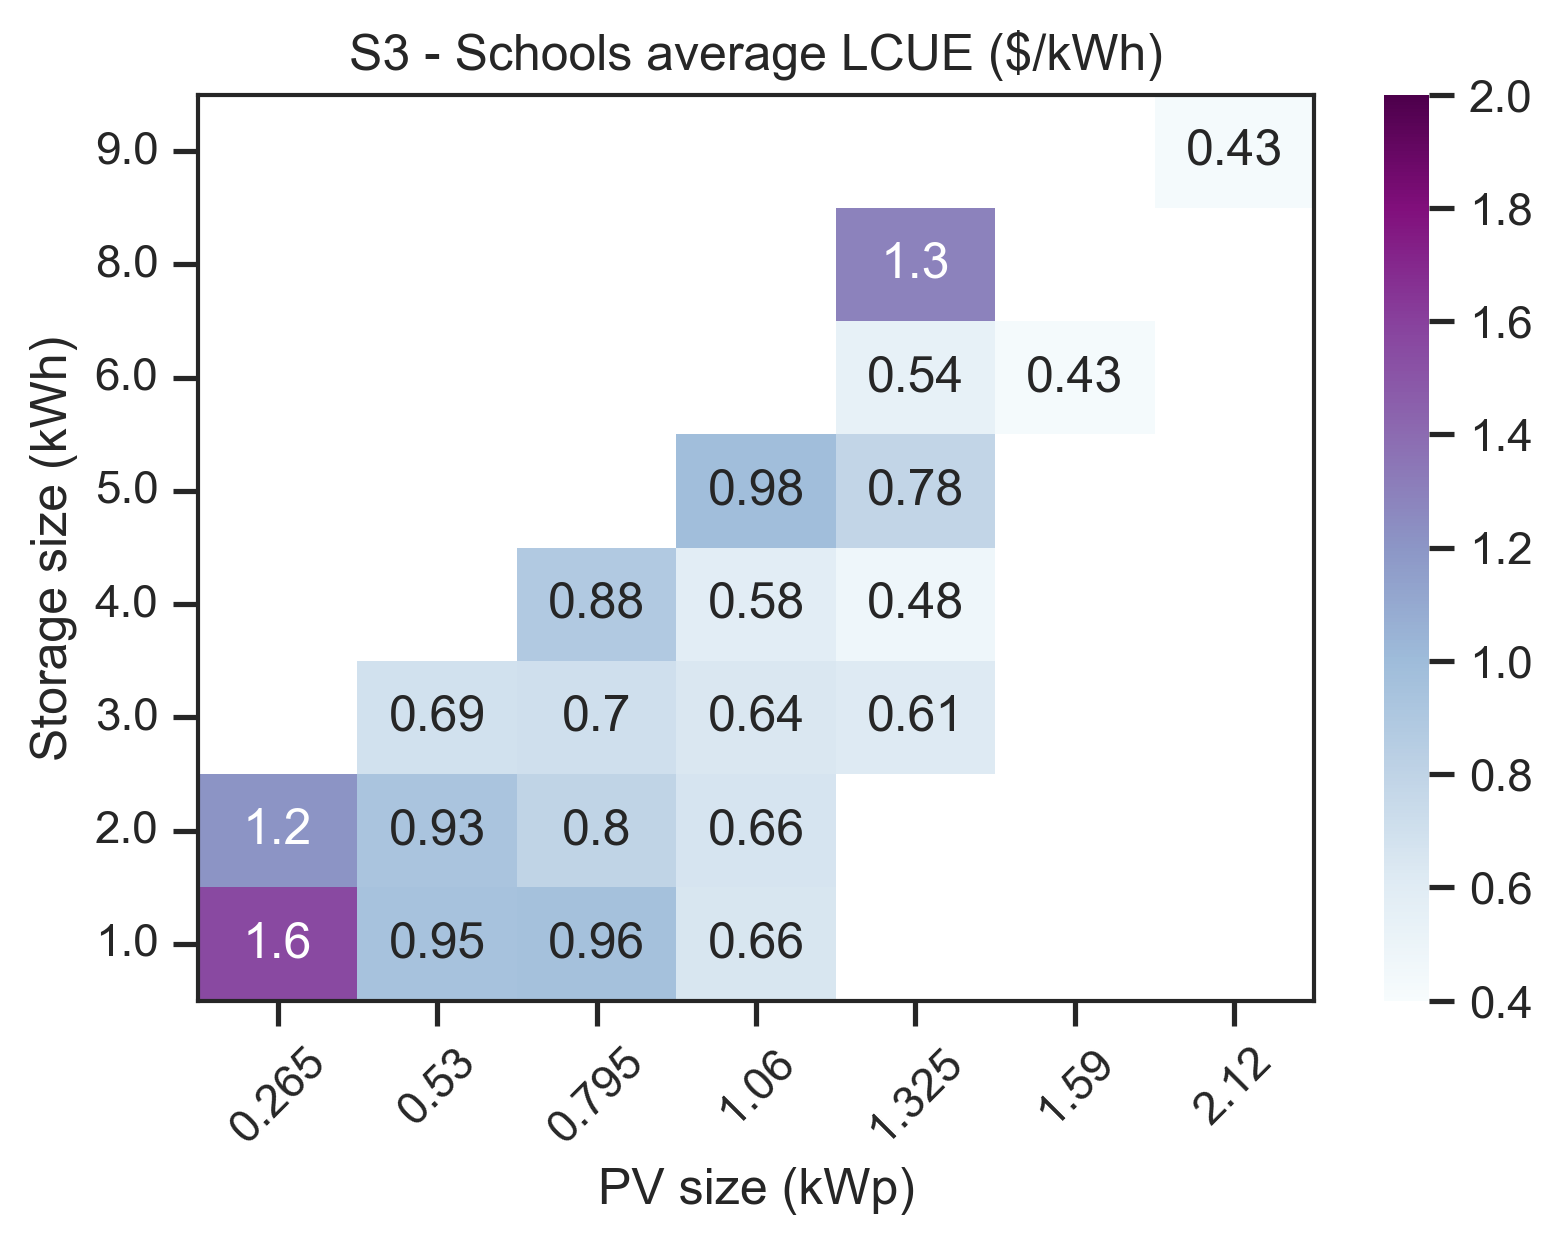

In [25]:
# S3 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_schools_s3_hp, vmin=0.4, vmax=2, cmap="BuPu", annot=True)  # 
ax.invert_yaxis()
ax.set_title("S3 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

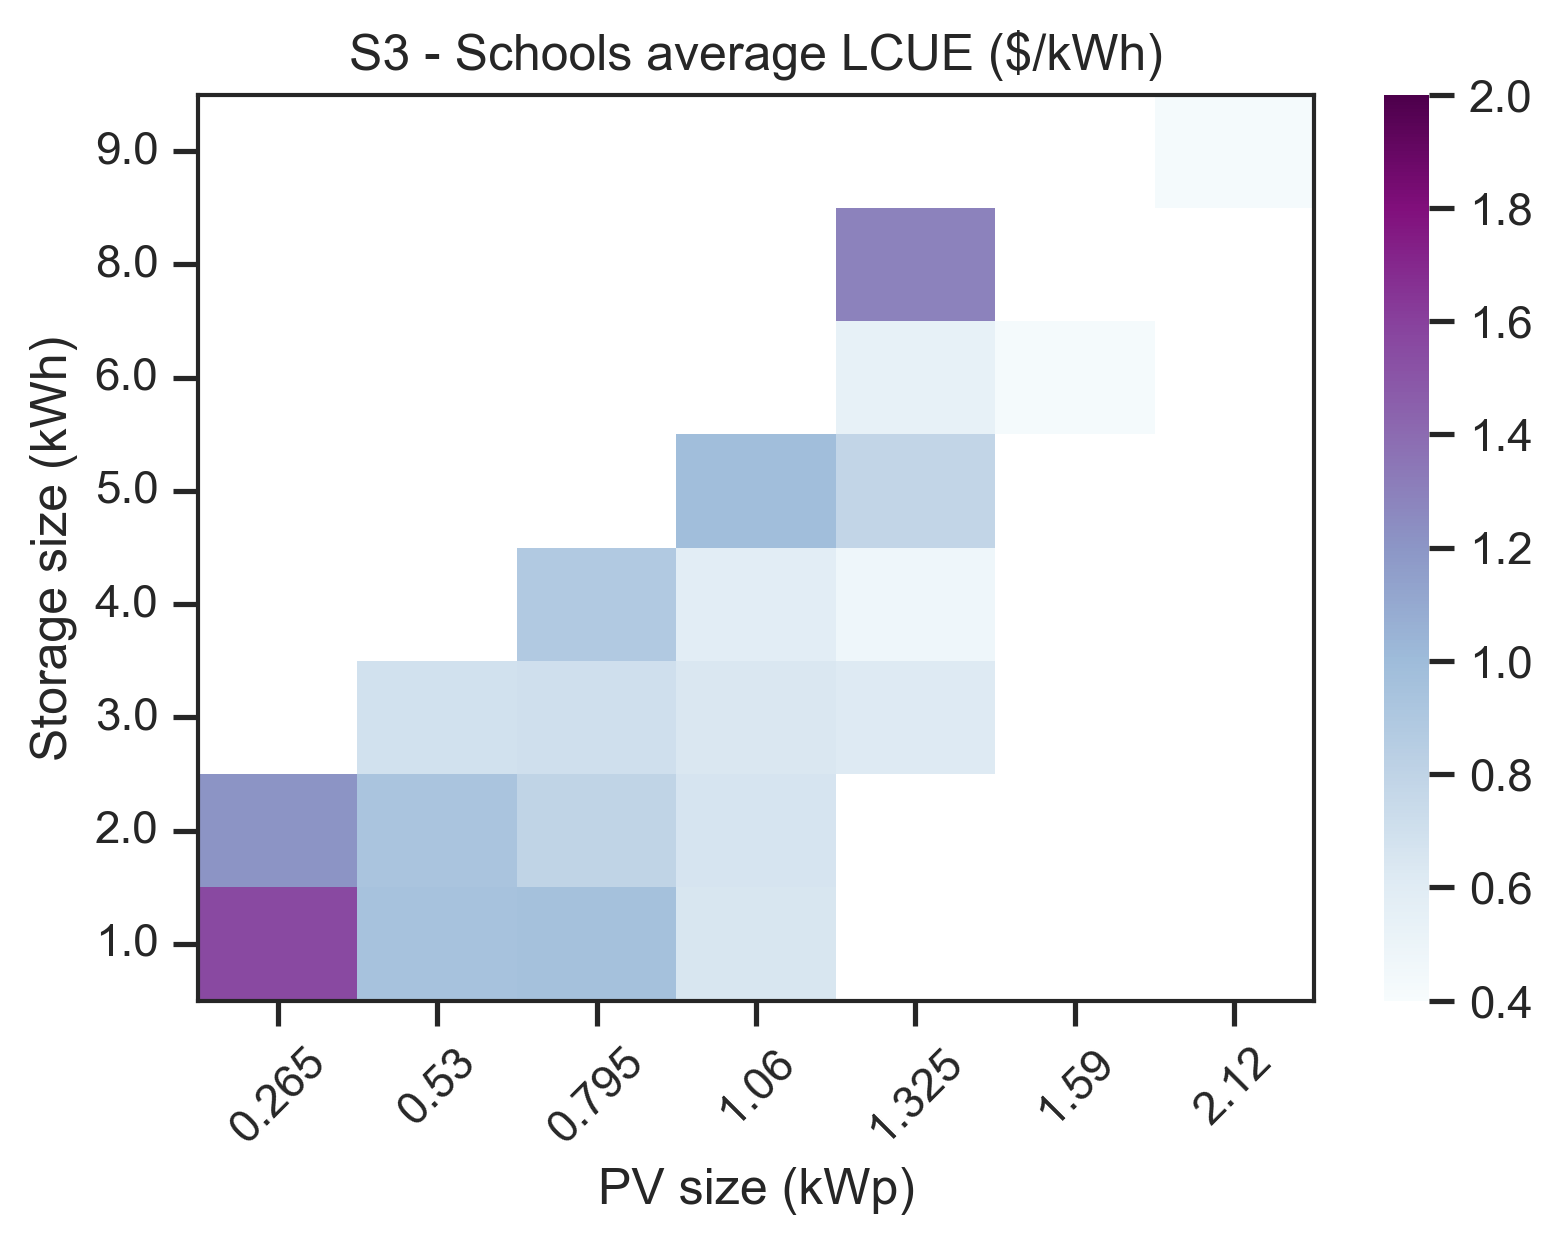

In [26]:
# S3 SCHOOL SIZES PLOT (Plotting data as it is - without annotation)
ax = sns.heatmap(lcue_schools_s3_hp, vmin=0.4, vmax=2, cmap="BuPu")  # 
ax.invert_yaxis()
ax.set_title("S3 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [27]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s4 = s4[s4.Institution != 'Clinic']

# to check there are 148 schools
schools_s4["Site_name"].count()  # returns 148

148

In [28]:
schools_s4["LCUE"].describe().round(2)  # to know LCUE values (all schools)

count    148.00
mean       0.96
std        0.45
min        0.39
25%        0.67
50%        0.84
75%        1.12
max        3.66
Name: LCUE, dtype: float64

In [29]:
# LCUE:
# Groups schools by Initial storage and PV size and calculates average LCUE in that bin
lcue_schools_s4 = schools_s4.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_schools_s4 = lcue_schools_s4.to_frame()
lcue_schools_s4.round(3) # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size       
1.0                  0.265            1.436
                     0.530            0.949
                     0.795            0.632
2.0                  0.265            1.236
                     0.530            0.830
                     0.795            0.721
                     1.060            0.547
3.0                  0.530            0.668
                     0.795            0.637
                     1.060            0.499
4.0                  0.795            0.492
                     1.060            0.662
                     1.325            0.389
5.0                  1.060            0.513
                     1.325            0.432
6.0                  1.325            0.389
7.0                  1.325            1.260
8.0                  1.855            0.412

In [30]:
# to know schools min and max average LCUE values (vmin & vmax)
lcue_schools_s4["LCUE"].describe().round(3)
                    # returns: min= 0.389 (vmin), max= 1.436 (vmax)
                    # returns count != than 148 because some sites have same size

count    18.000
mean      0.706
std       0.318
min       0.389
25%       0.494
50%       0.635
75%       0.803
max       1.436
Name: LCUE, dtype: float64

In [31]:
# Pivot df to be able to do heatmap
lcue_schools_s4_hp = lcue_schools_s4.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")

In [32]:
lcue_schools_s4_hp.round(3) # to show in Jupyter

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  1.855
Initial_storage_size                                          
1.0                   1.436  0.949  0.632    NaN    NaN    NaN
2.0                   1.236  0.830  0.721  0.547    NaN    NaN
3.0                     NaN  0.668  0.637  0.499    NaN    NaN
4.0                     NaN    NaN  0.492  0.662  0.389    NaN
5.0                     NaN    NaN    NaN  0.513  0.432    NaN
6.0                     NaN    NaN    NaN    NaN  0.389    NaN
7.0                     NaN    NaN    NaN    NaN  1.260    NaN
8.0                     NaN    NaN    NaN    NaN    NaN  0.412

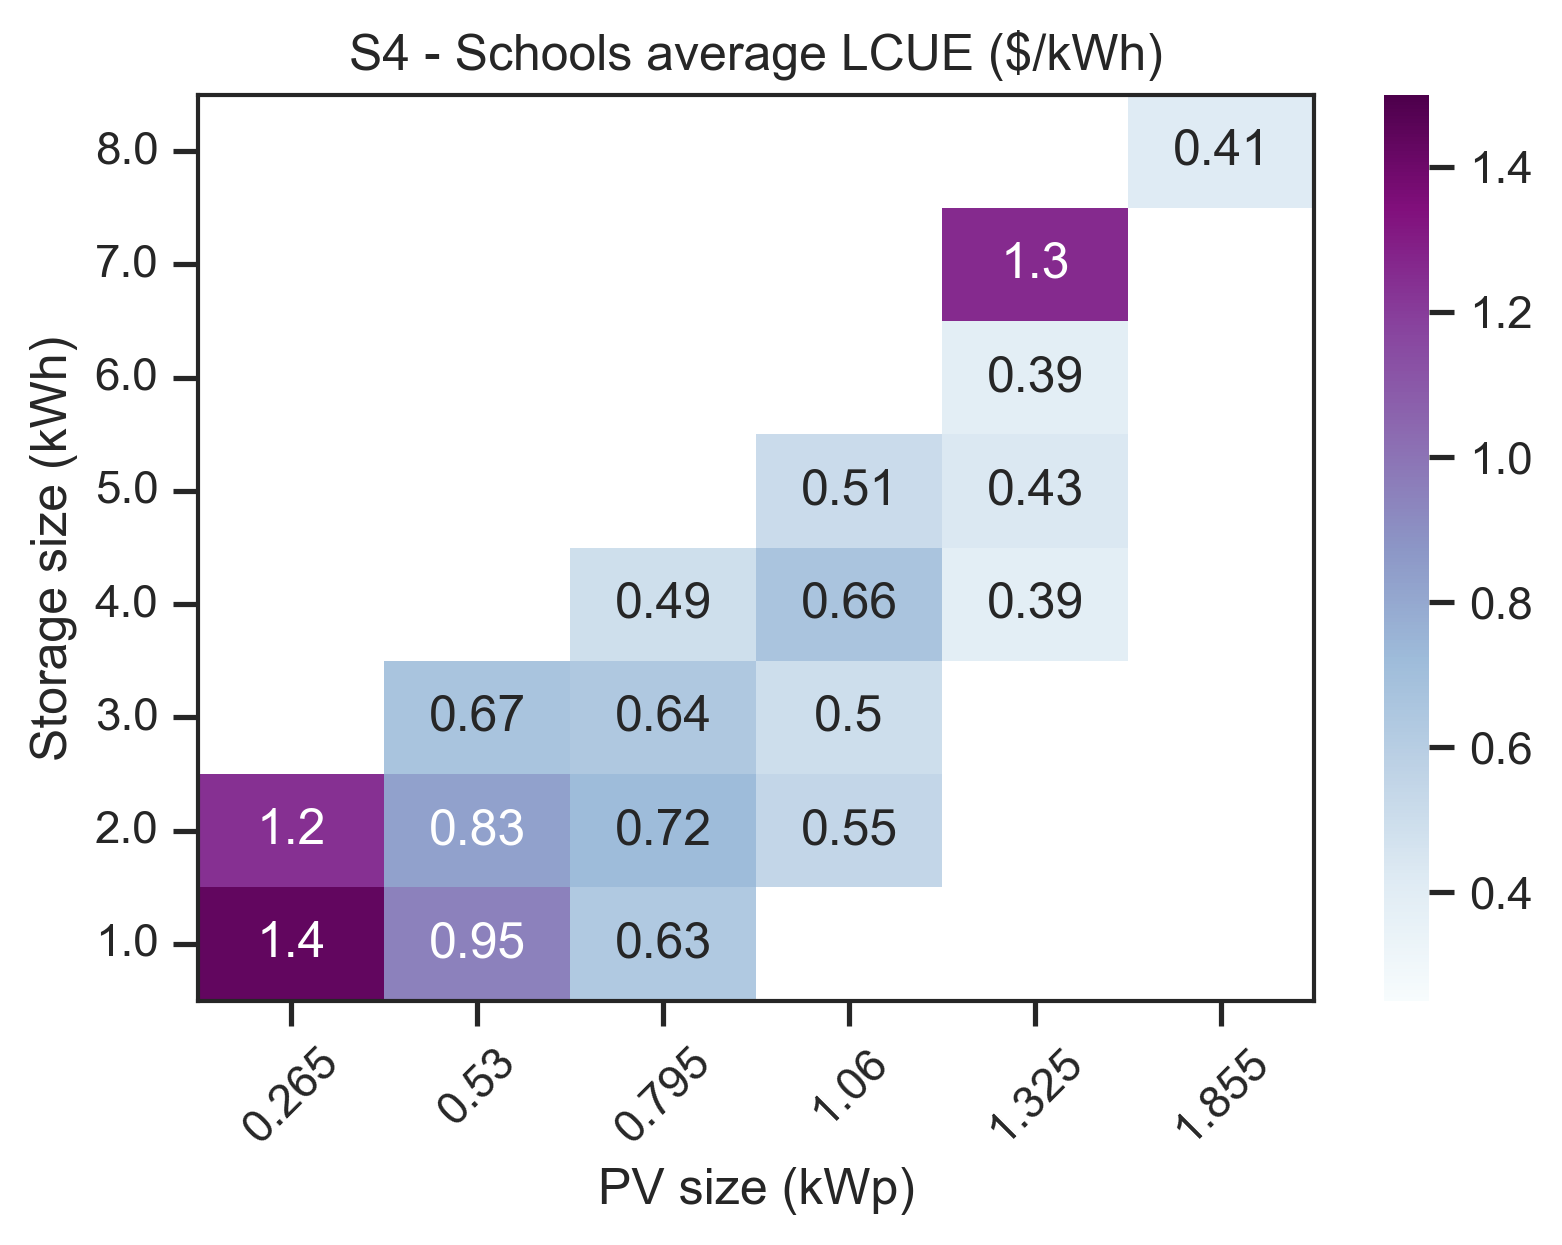

In [33]:
# S4 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_schools_s4_hp, vmin=0.25, vmax=1.5, cmap="BuPu", annot=True)  # 
ax.invert_yaxis()
ax.set_title("S4 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

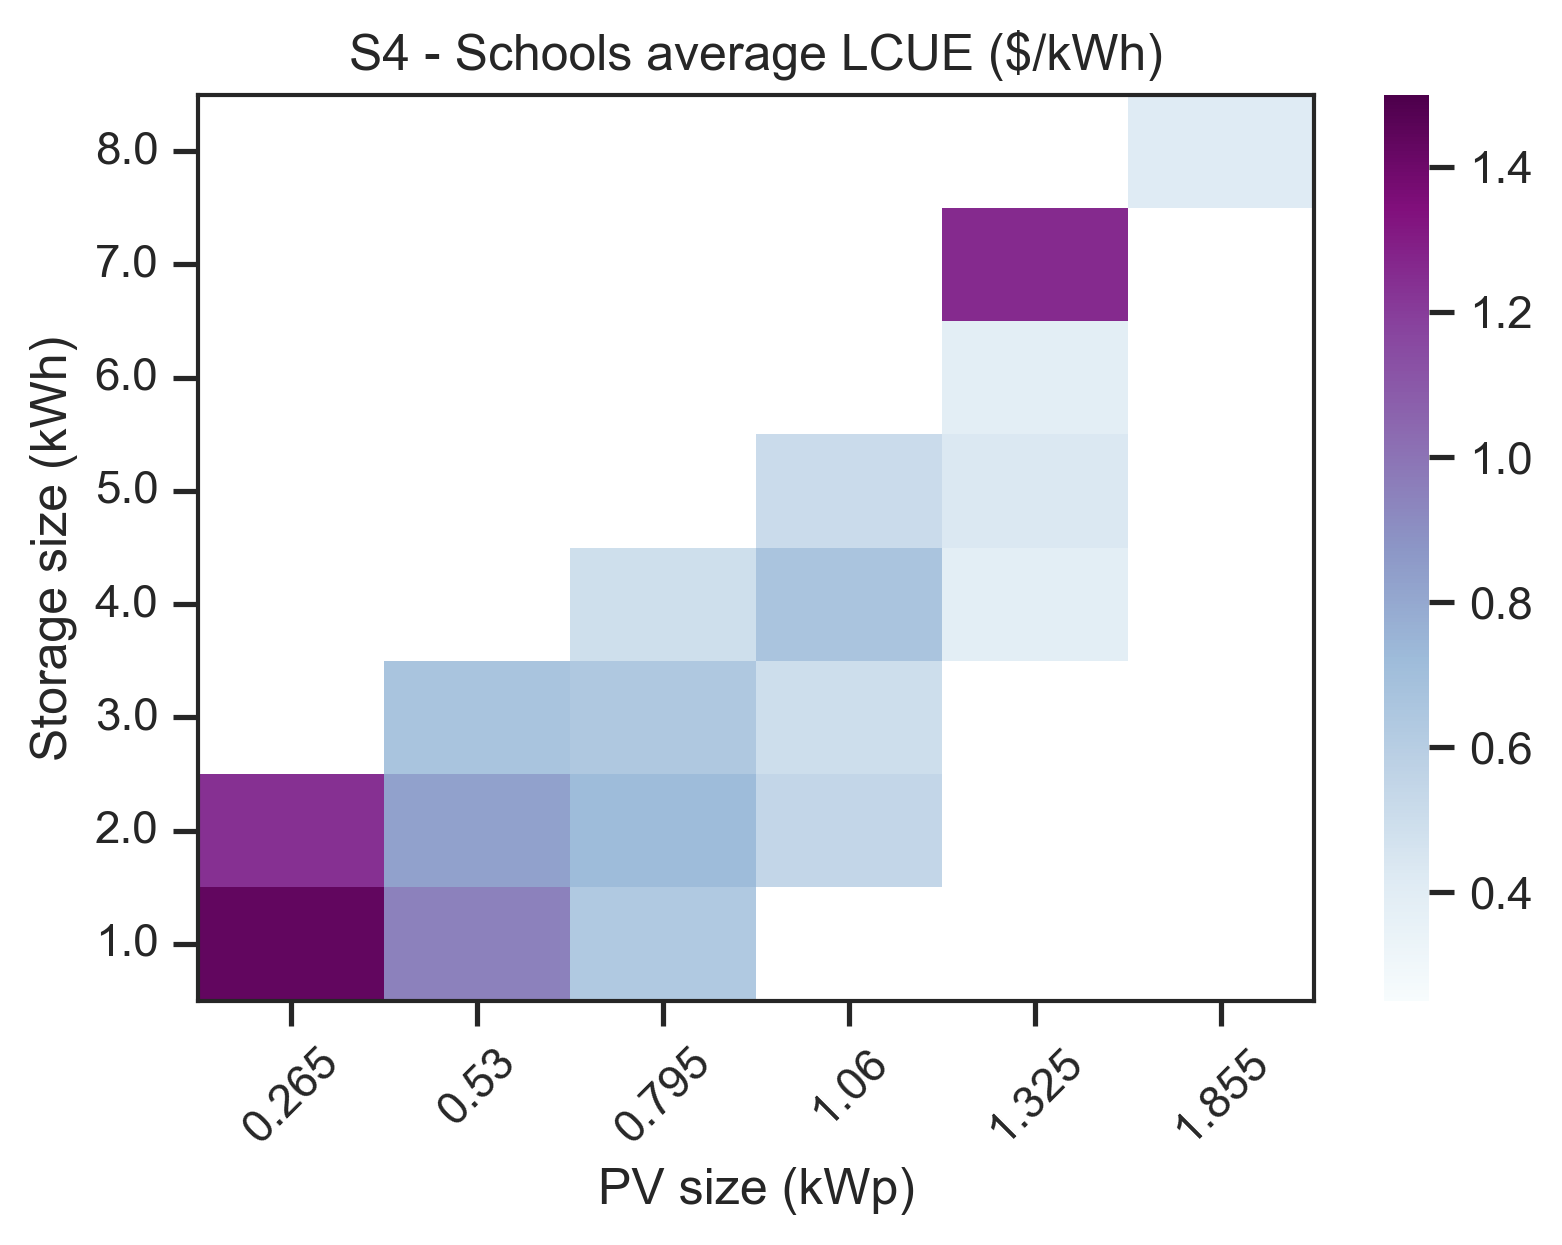

In [34]:
# S4 SCHOOL SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(lcue_schools_s4_hp, vmin=0.25, vmax=1.5, cmap="BuPu")  # 
ax.invert_yaxis()
ax.set_title("S4 - Schools average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

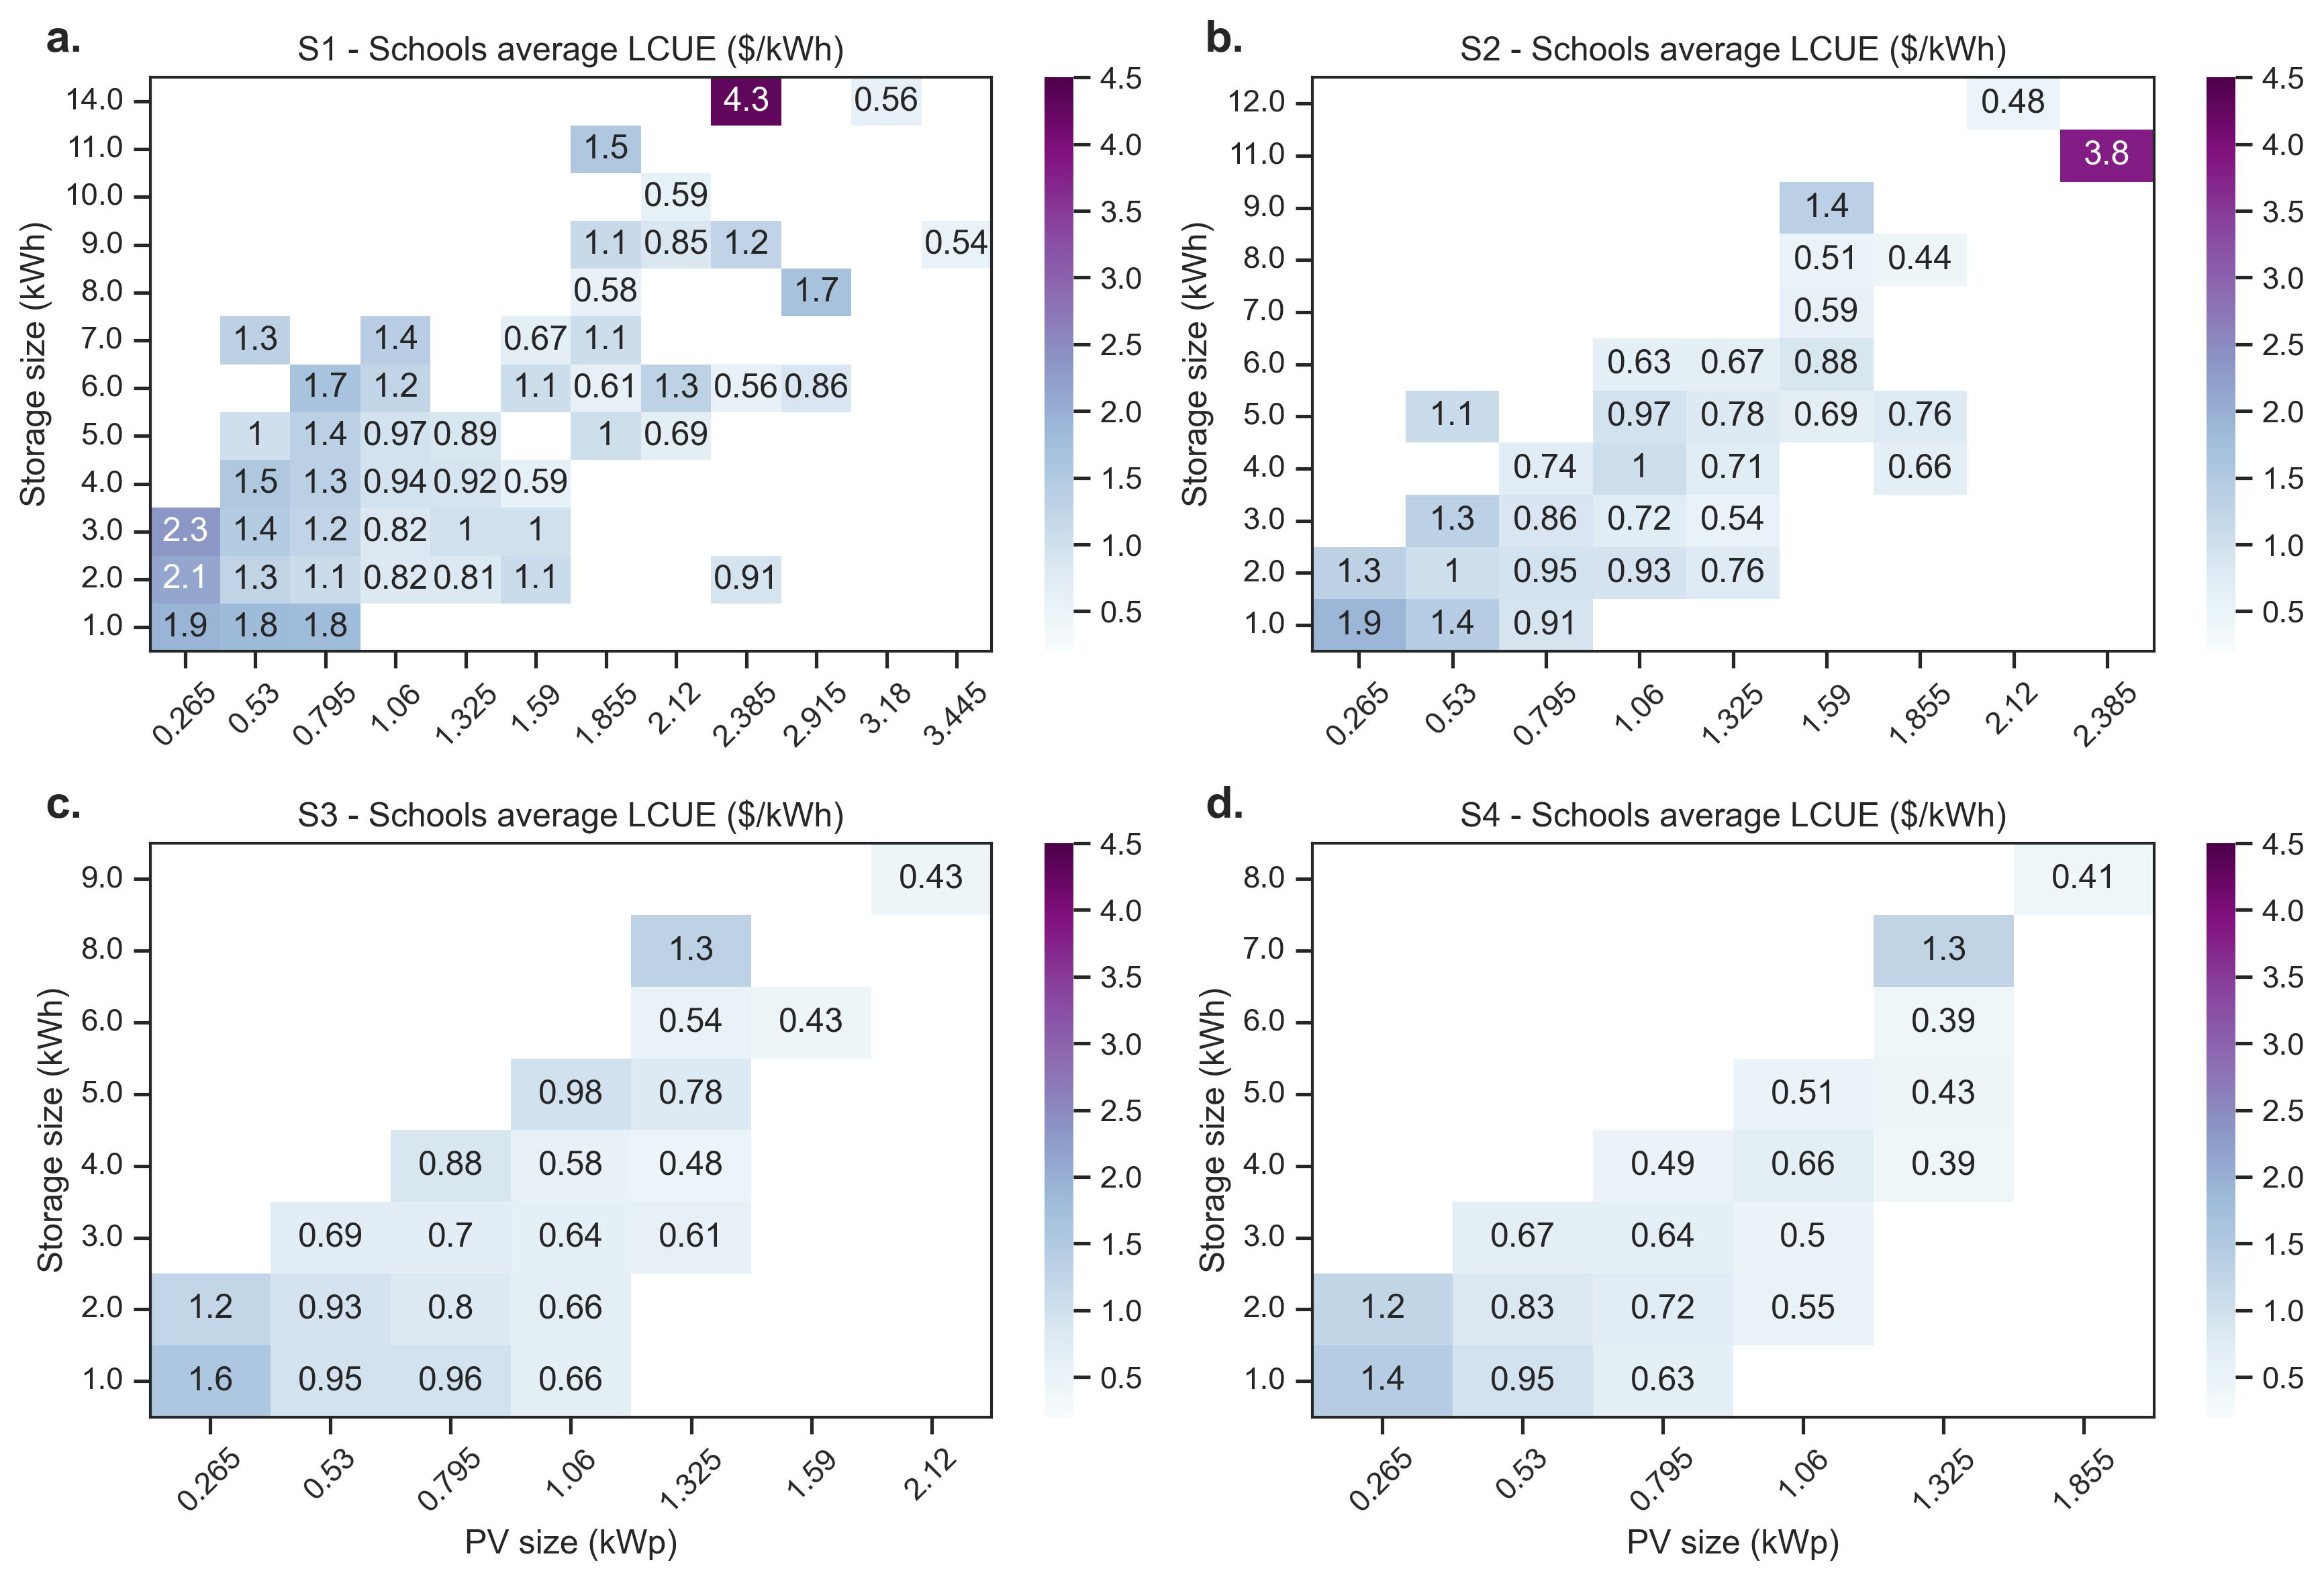

In [35]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., lcue_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_schools_s1_hp, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_schools_s2_hp, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_schools_s3_hp, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_schools_s4_hp, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

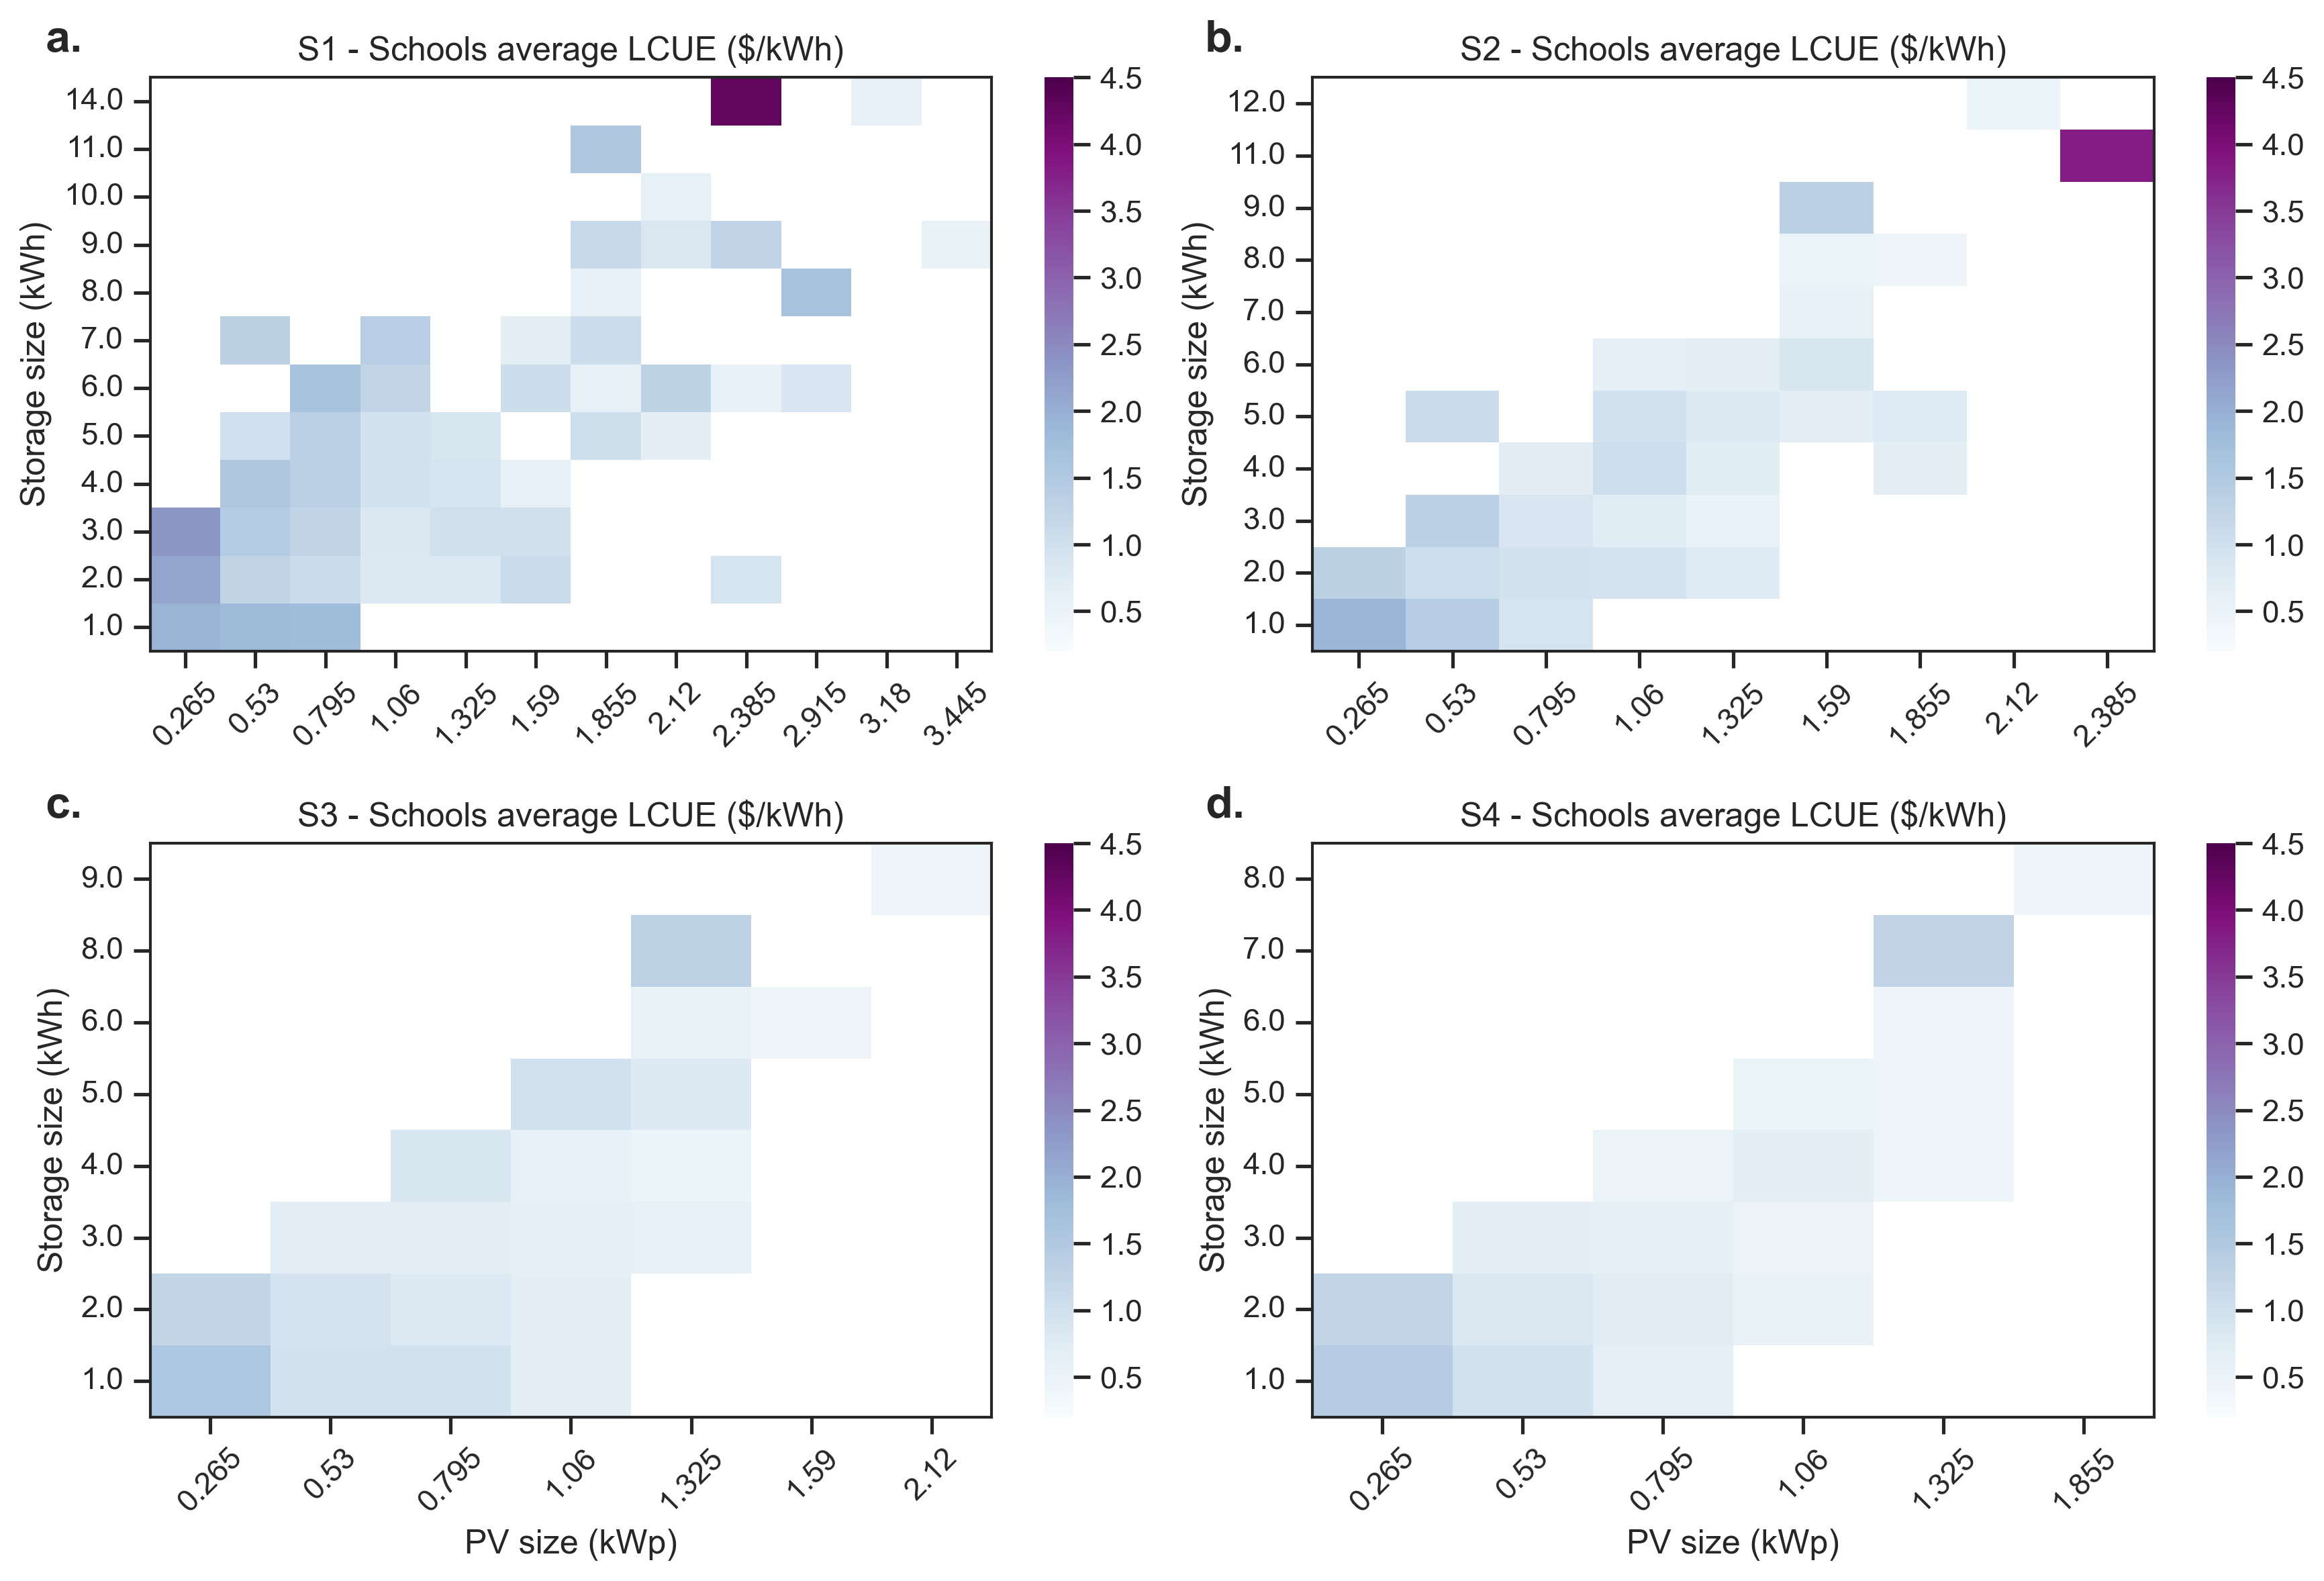

In [36]:
# SAME PLOT AS ABOVE BUT WITHOUT "annot=True"
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., lcue_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_schools_s1_hp, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_schools_s2_hp, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_schools_s3_hp, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_schools_s4_hp, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [37]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS
# S1
lcue_schools_s1_hp_ext = lcue_schools_s1_hp.reindex(range(1,15), axis=0) # fill_value=0
lcue_schools_s1_hp_ext = lcue_schools_s1_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S2
lcue_schools_s2_hp_ext = lcue_schools_s2_hp.reindex(range(1,15), axis=0) # fill_value=0
lcue_schools_s2_hp_ext = lcue_schools_s2_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S3
lcue_schools_s3_hp_ext = lcue_schools_s3_hp.reindex(range(1,15), axis=0) # fill_value=0
lcue_schools_s3_hp_ext = lcue_schools_s3_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S4
lcue_schools_s4_hp_ext = lcue_schools_s4_hp.reindex(range(1,15), axis=0) # fill_value=0
lcue_schools_s4_hp_ext = lcue_schools_s4_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

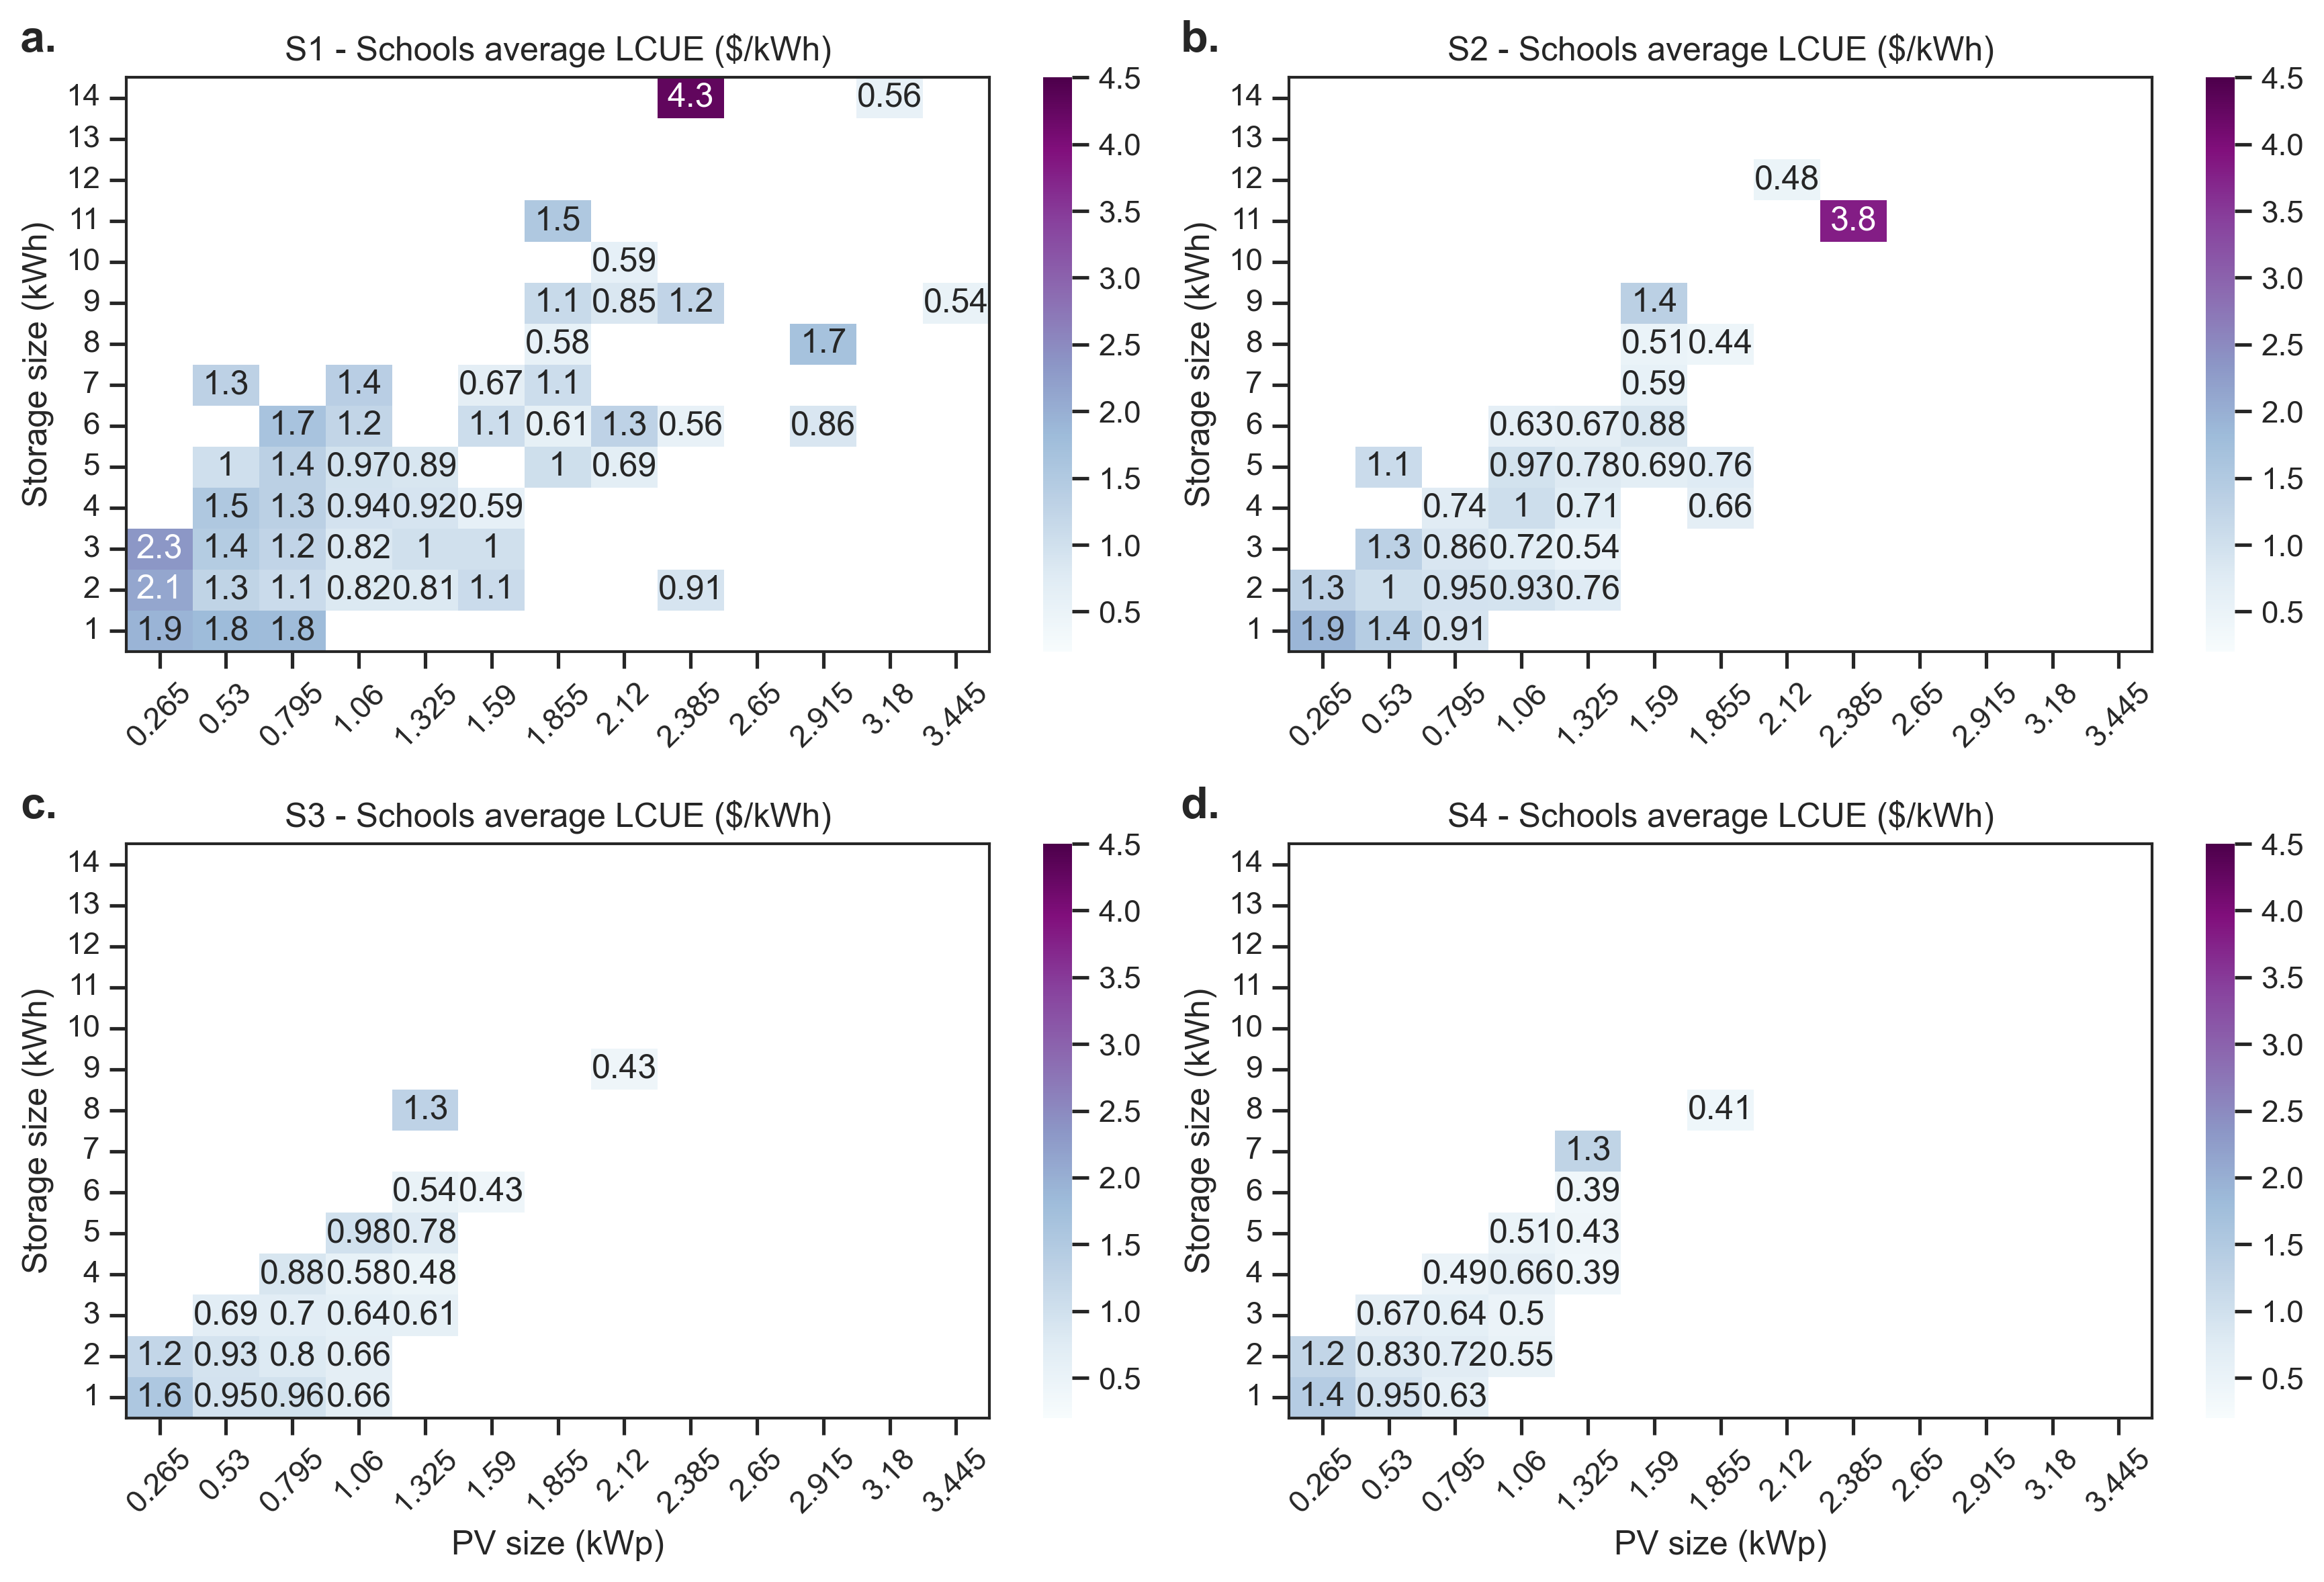

In [38]:
# SAME PLOT AS ABOVE BUT EXTENDING AXIS TO HAVE SAME LINEAR AXIS AND WITH "annot=True"
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with with same axis and same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., lcue_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_schools_s1_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_schools_s2_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_schools_s3_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_schools_s4_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

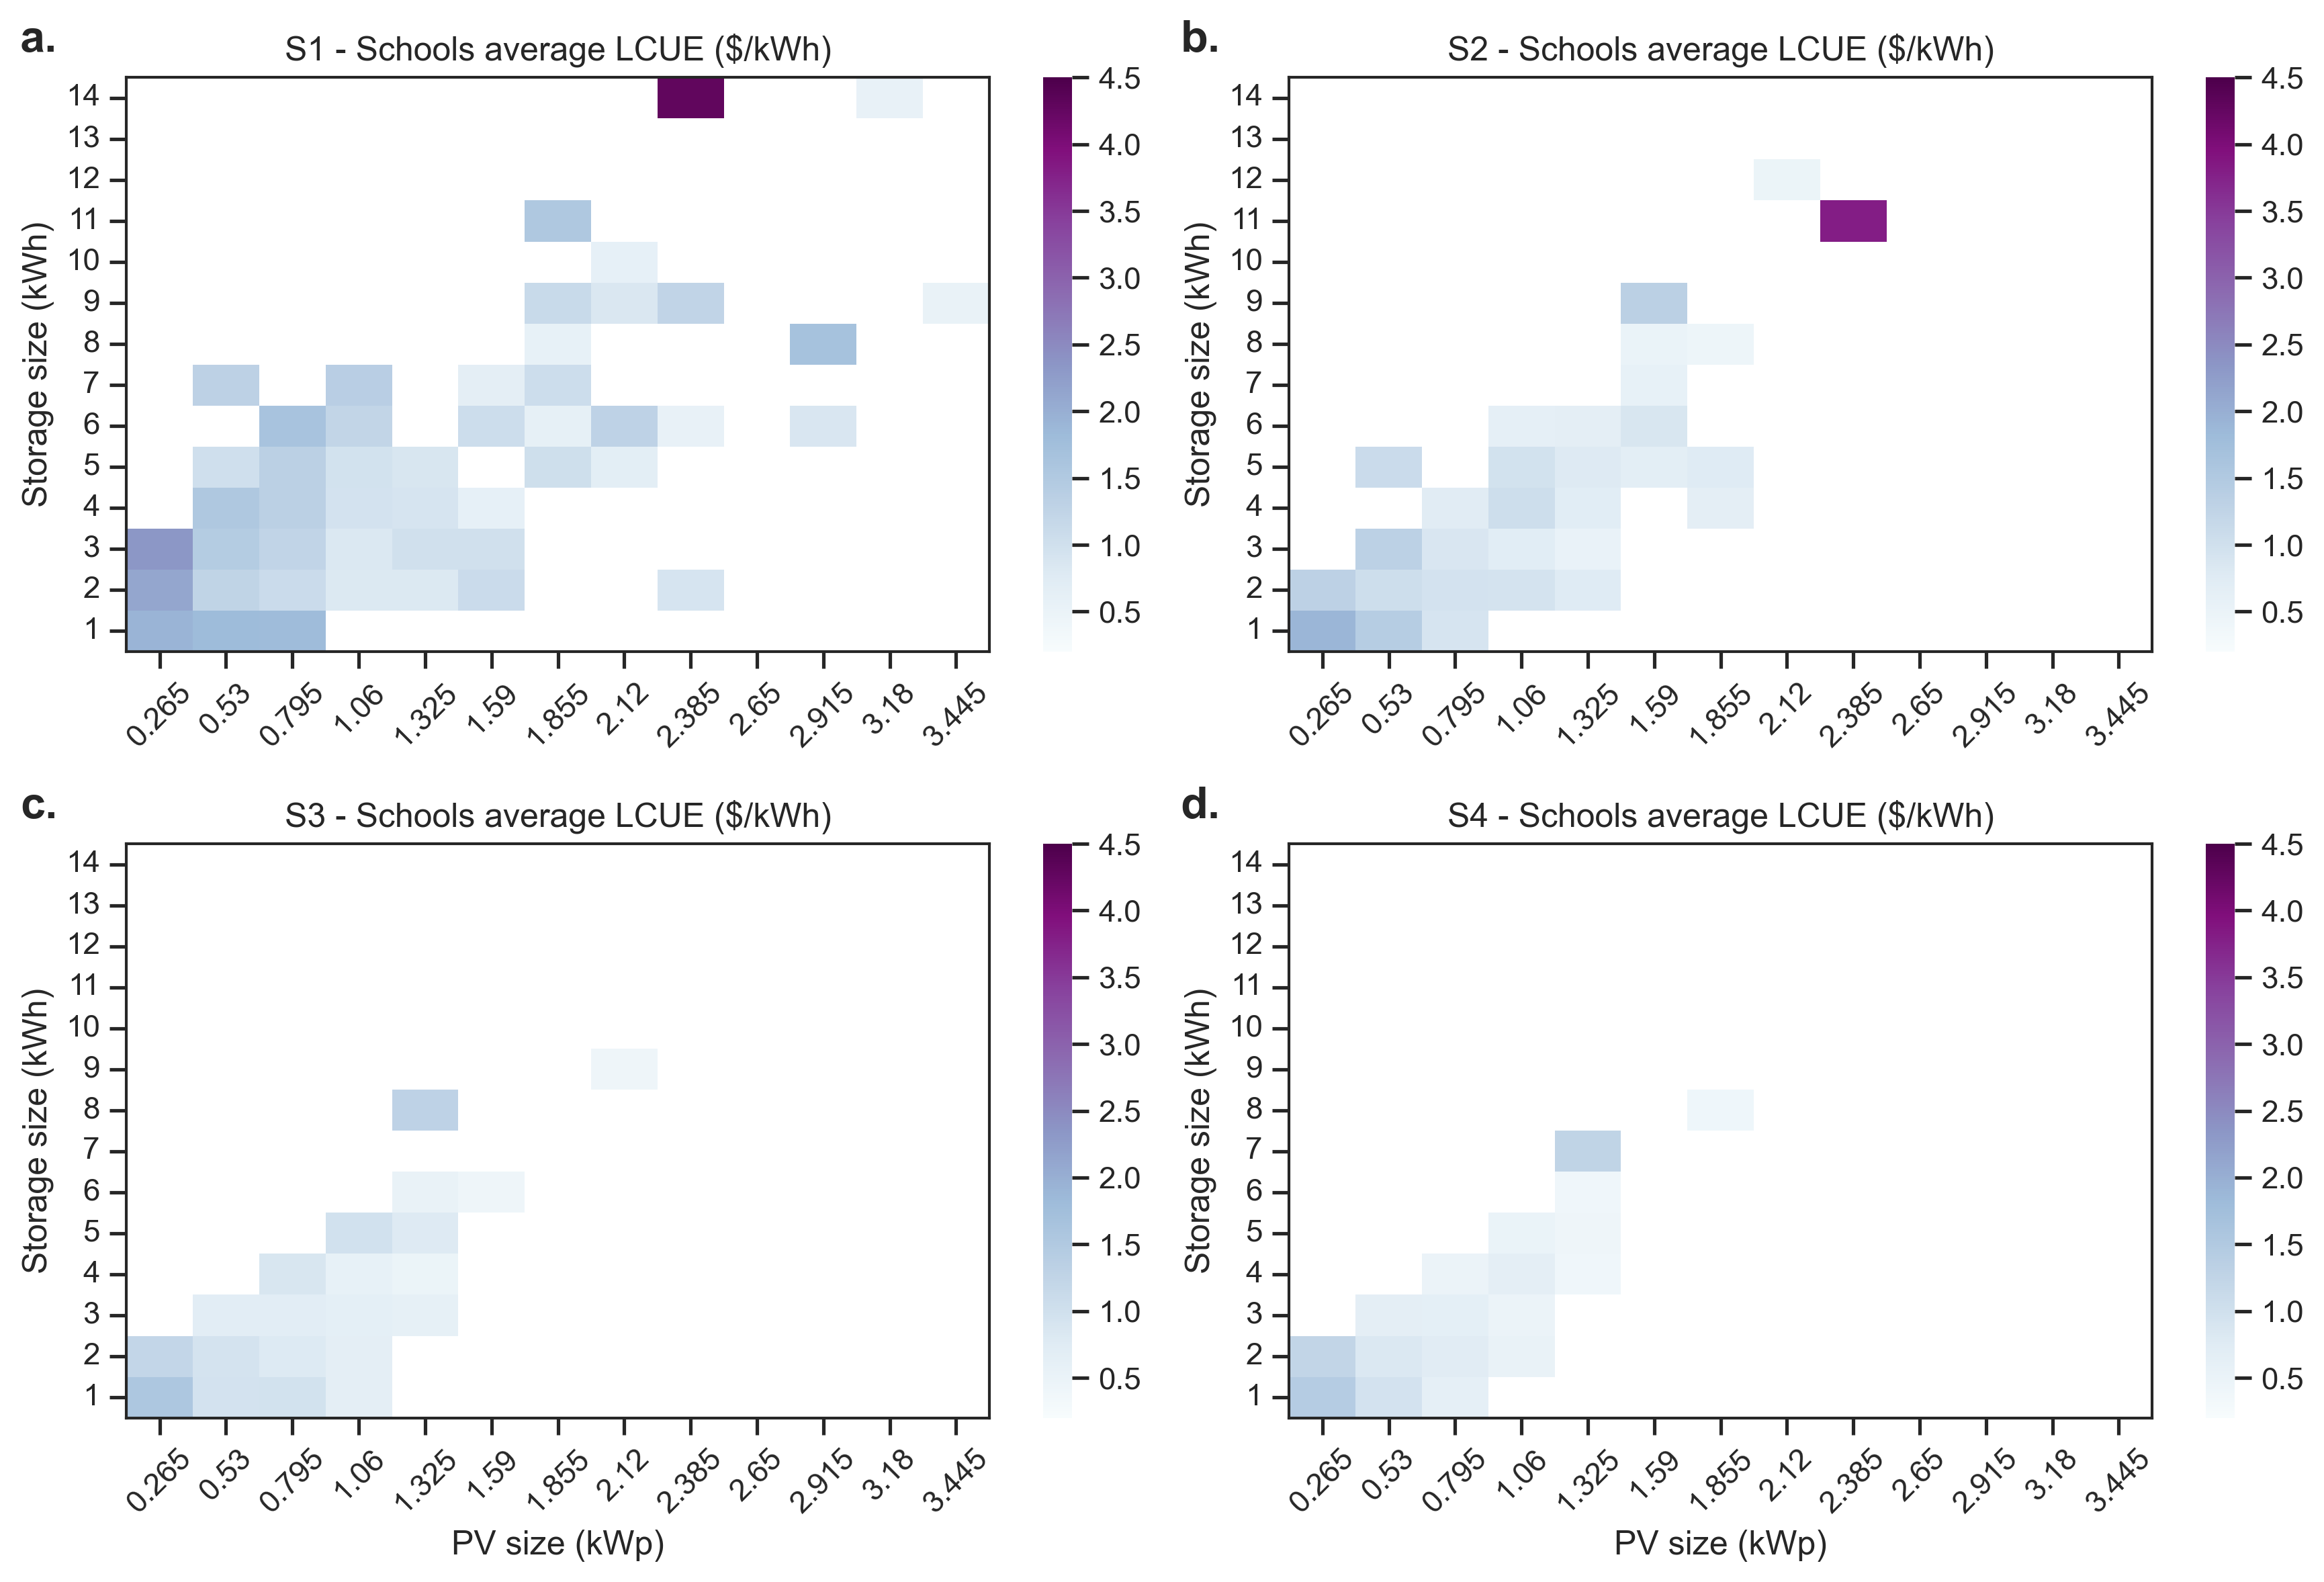

In [39]:
# SAME PLOT AS ABOVE BUT EXTENDING AXIS TO HAVE SAME LINEAR AXIS AND WITHOUT "annot=True"
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with same axis and same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., lcue_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_schools_s1_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", 
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_schools_s2_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_schools_s3_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_schools_s4_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

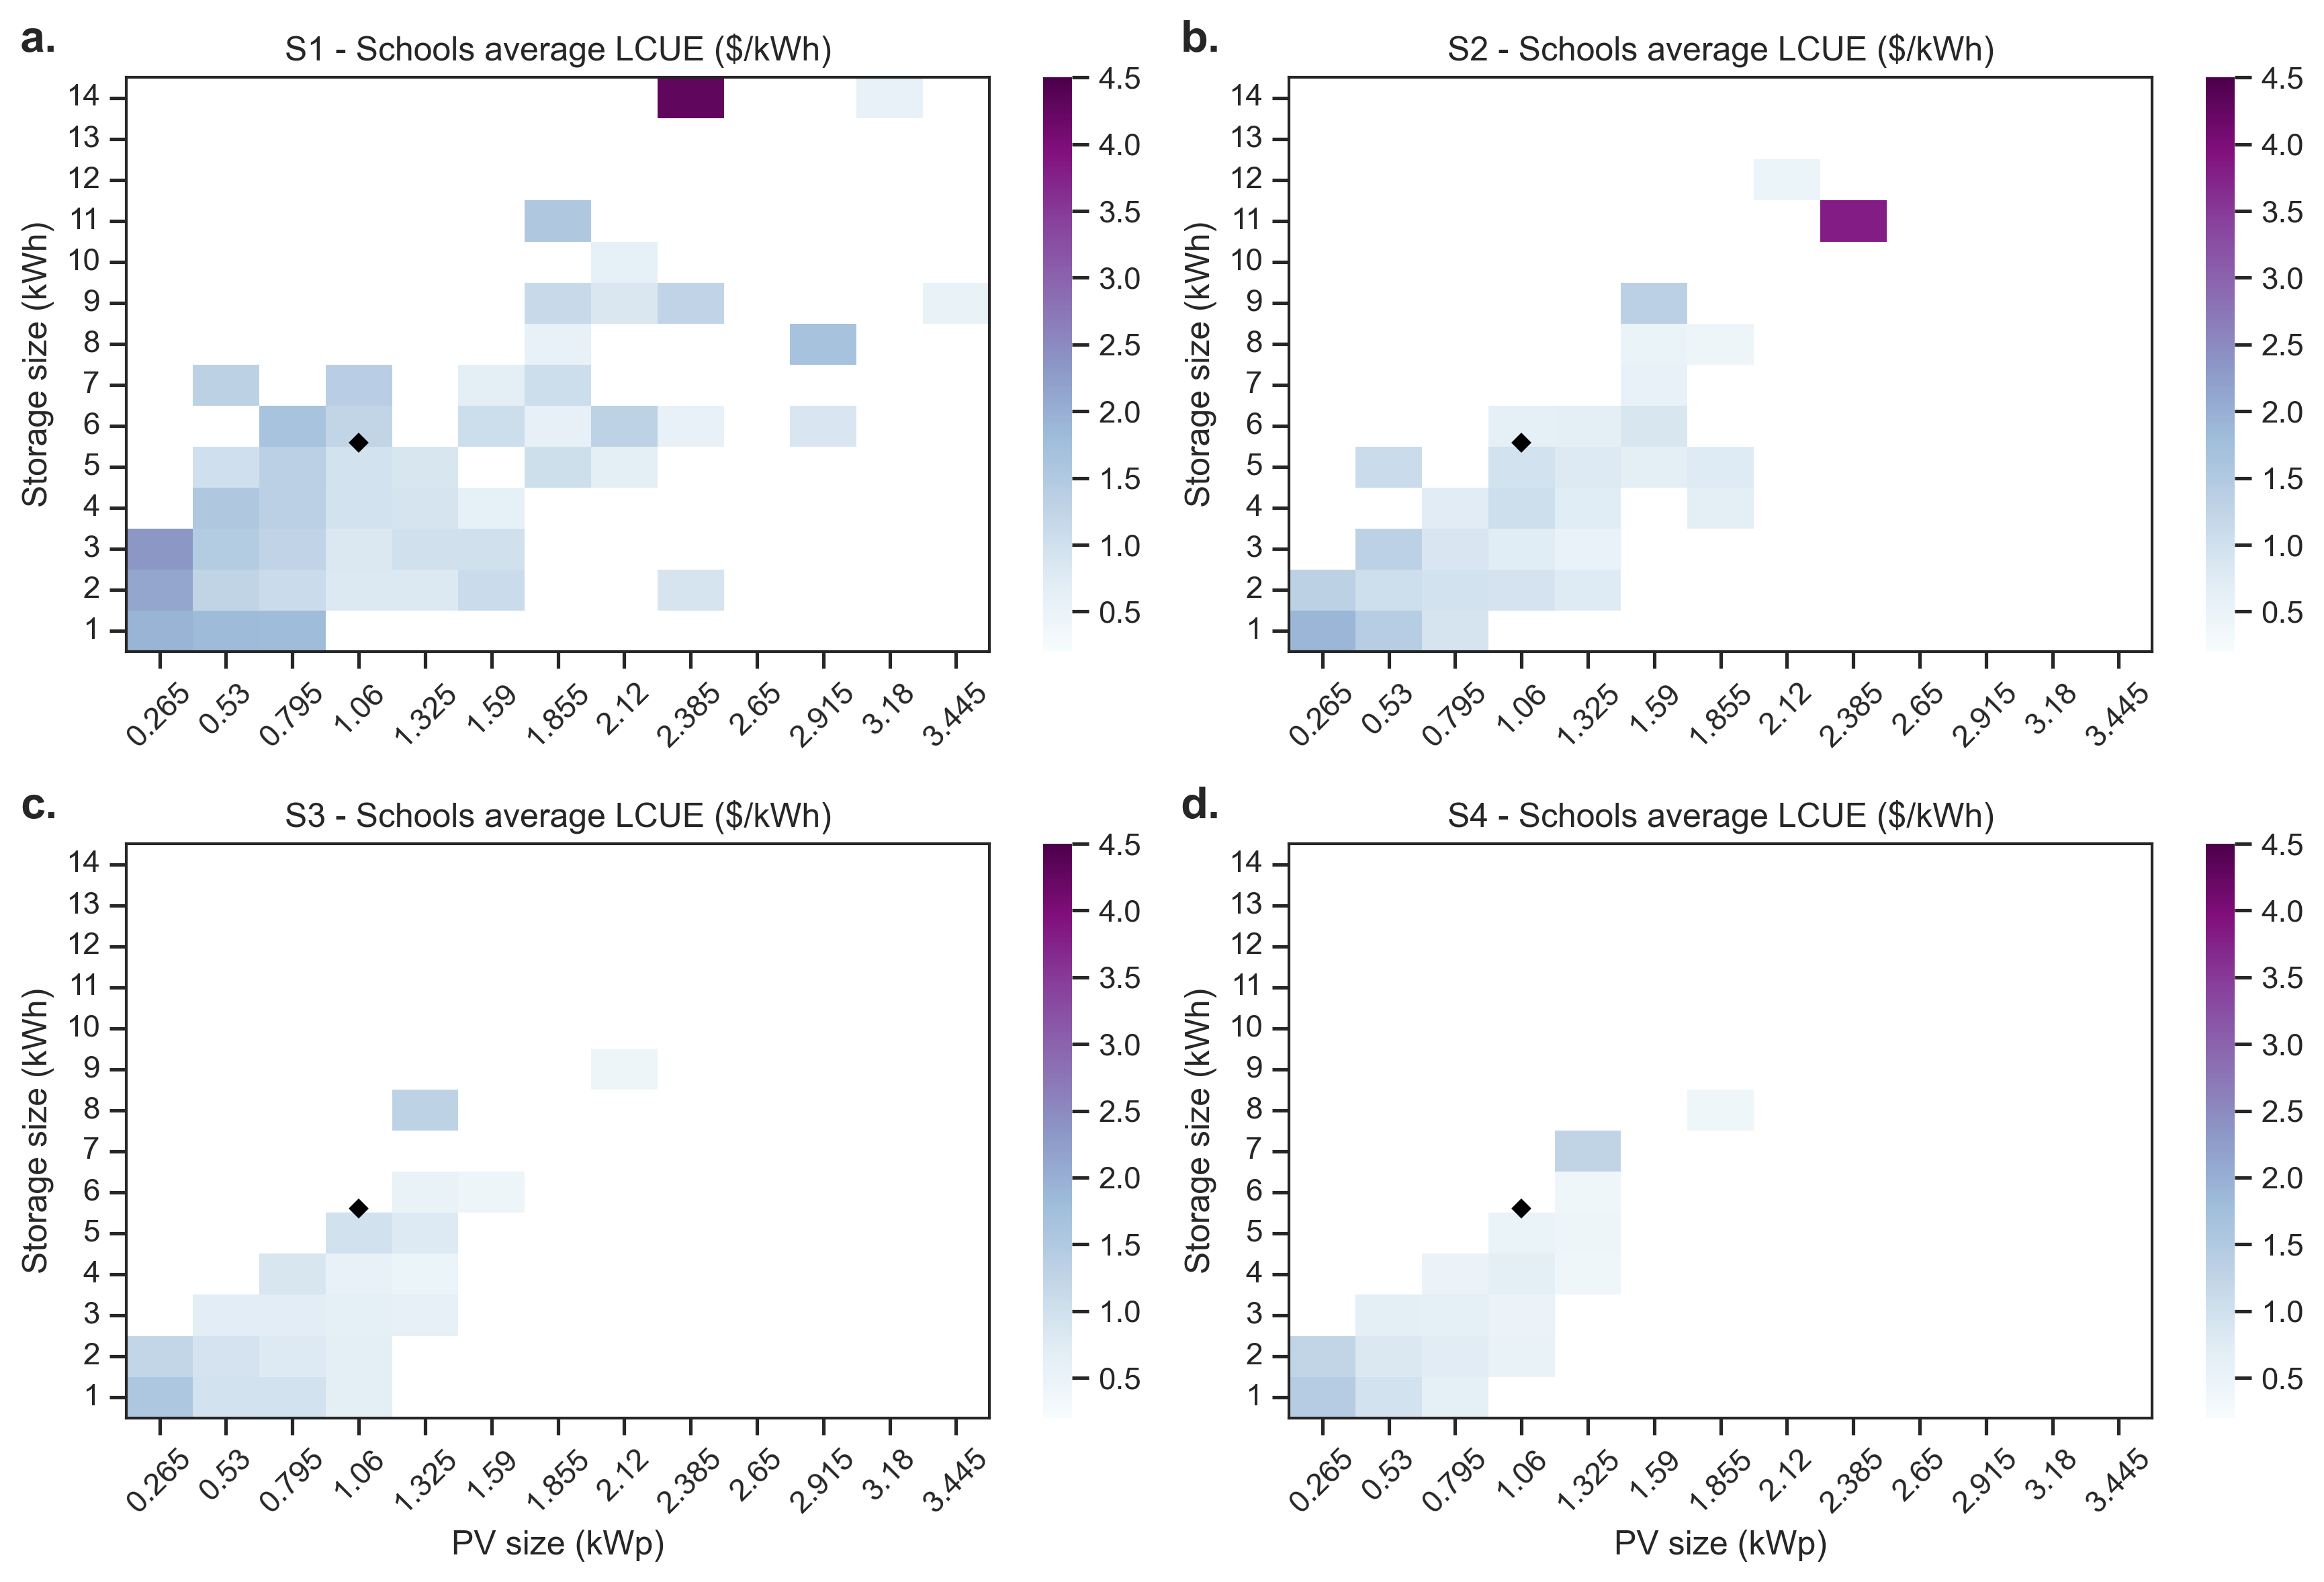

In [40]:
# SAME AS ABOVE BUT ADDING IMPALA SYSTEM AS DATA POINT (only system size)
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with same axis and same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., lcue_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_schools_s1_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu", 
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_schools_s2_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_schools_s3_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_schools_s4_hp_ext, vmin=0.2, vmax=4.5, cmap="BuPu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [ ]:
# Last two plots are the final version used so far. So if I need to rerun this plot, don't
# do all the plots again. Just do the last two plots. 
# I added Impala systems as a data point/marker but this only indicates the system size. 
# I was originally thinking of colouring the diamond marker with the average LCUE of schools
# in S0 (around 1.55) but JN mentioned it didn't make sense to do this bc they are a spread.
# Instead show (boxplot?) of LCUE of S0 per institution type. 